<a href="https://colab.research.google.com/github/DiegoFortezaBenito/deeplearning/blob/main/AA_Gr10_Pr1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
#Importación de las librerías a utilizar durante la práctica
import numpy as np
import keras
import tensorflow as tf
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

keras.__version__

'2.13.1'

#Practica 1

## Resumen
Esta práctica consiste en la creación de varios modelos de Redes de Neuronas Artificiales que sean capaces de reconocer y clasificar
imágenes de ropa en sus diferentes tipologías. Para entrenar a los modelos se utilizará el conjunto de datos **Fashion-MNIST**.

Esta base de datos contiene 70k imágenes de (28 x 28 píxeles) en escala de grises de prendas de ropa pertenecientes a la tienda de moda online Zalando.

El conjunto de todas las imágenes se puede clasificar en 10 clases (del 0 al 9) donde cada clase está asociada a un tipo de ropa distinta.

La prenda a la que pertenece cada clase se muestra en la siguiente tabla:

| **CLASE** | **PRENDA** |
|-----------|------------|
| 0         | T-shirt    |
| 1         | Trouser    |
| 2         | Pullover   |
| 3         | Dress      |
| 4         | Coat       |
| 5         | Sandal     |
| 6         | Shirt      |
| 7         | Sneaker    |
| 8         | Bag        |
| 9         | Ankle boot |

##Introducción al Problema

Para realizar los modelos primero se debe cargar el conjunto de datos de Fashion-MNIST en keras. Para ello se utiliza la función `keras.datasets.fashion_mnist ` la cual como ya se ha mencionado contiene 70k de imágenes de las cuales se usarán 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con el objetivo de que la red aprende a clasificar las imágenes.  
Además, se define un vector class_names con los nombres de cada tipo de prenda ordenados como en la tabla.



In [138]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
class_names = ["T-shirt",  "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

Ahora se comprueba la naturaleza de los datos cargados, concretamente su tamaño y su forma


In [139]:
print("Dimensión datos a entrenar",train_data.shape)
print("Dimensión etiquetas a entrenar",train_labels.shape)
print("Dimensión datos a evaluar",test_data.shape)
print("Dimensión etiquetas a evaluar",test_labels.shape)

Dimensión datos a entrenar (60000, 28, 28)
Dimensión etiquetas a entrenar (60000,)
Dimensión datos a evaluar (10000, 28, 28)
Dimensión etiquetas a evaluar (10000,)


Observamos que:

*   `train_data` y `test_data` contienen 60.000 y 10.000 matrices de 28x28 cada una.
*   `train_labels` y `test_labels` contienen 60.000 y 10.000 etiquetas asociadas a su matriz perteneciente a los datos de entrenamiento.

###Verificación de los datos introducidos

Se comprueba que los datos se han cargado correctamente mostrando la matrices correspondientes a las imagenes 10.000 de `train_data` y 5.000 de `test_data ` y posteriormente sus correspondientes etiquetas asociadas.

In [140]:
# Imagenes representadas como matrices
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_data[10000]))
print(f'\n\n')
print(np.matrix(test_data[5000]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  55  89 161 117  74  92  60   0   0   0   0   0   0   0   0   0   0   0   0   0   0   9  19   0   0]
 [  0  77 143 239 231 175 117 139 157 218 212 173 120 174 206 146 163 154 170 150 127 158 201 224 198 132 113   0]
 [  0 142 147  79   0  84 223 135   0   0  33 144  89 202  51   0   0   0 142 179 205 115  94  62  28 141 113   0]
 [  0 152 210  43   0  57 223 151   0   0   0  62 123 192   0   3   0  76 109 10

Ahora veamos las imágenes en un plot binario (blanco-negro) para su mejor entendimiento ya que la representación en matriz con los valores no se diferencia bien.

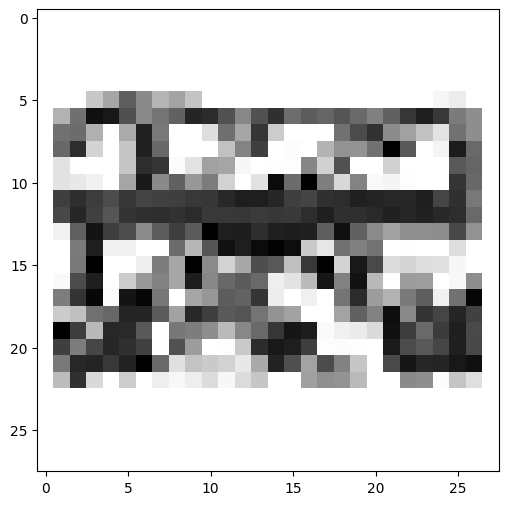

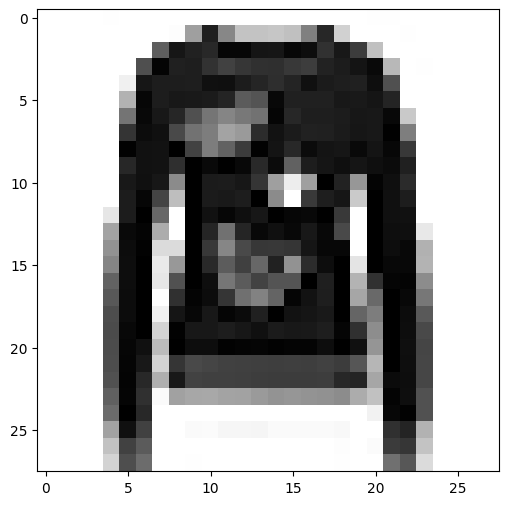

In [141]:
# Imágenes pintadas con matplotlib
prenda = train_data[10000]
prenda2 = test_data[5000]
plt.imshow(prenda, cmap=plt.cm.binary)
plt.show()
plt.imshow(prenda2, cmap=plt.cm.binary)
plt.show()

Se puede observar que la primera imagen es un bolso mientras que la segunda es un jersey. Para estar seguros se comprueban sus etiquetas:

In [142]:
#Etiquetas de las imágenes
print(class_names[(train_labels[10000])])
print(class_names[(test_labels[5000])])

Bag
Pullover


###Preprocesamiento de los datos introducidos

Se normalizan los valores de las imágenes para optimizar y mejorar el funcionamiento de la red neuronal. Se divide entre 255 ya que es el valor máximo posible de los bits de las imágenes. Además, ponemos 255.0 para asegurarnos que la división nos da un valor decimal (float) y no un entero (int).

In [143]:
train_data = train_data/255.0
test_data = test_data/255.0
type(train_data[0,1,1])

numpy.float64

Ahora se pasan las etiquetas, almacenadas como los valores de los índices, a one-hot-encoding con la funcion to_categorical

In [144]:
print(train_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Como se ha mencionado con anterioridad, se separan 12K imágenes para la validación durante el entrenamiento de la red neuronal.

In [145]:
x_val = train_data[:12000]
train_data_p = train_data[12000:]

y_val = train_labels[:12000]
train_labels_p = train_labels[12000:]

print(train_data_p.shape)
print(train_labels_p.shape)

print(x_val.shape)
print(y_val.shape)

(48000, 28, 28)
(48000, 10)
(12000, 28, 28)
(12000, 10)


###Funciones a utilizar durante la ejecución de las redes

Por último, definimos las funciones que vamos a utilizar para ver las predicciones de cada red neuronal

In [146]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'
  class_names = ["T-shirt",  "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def show_predicted_distributions(predictions, n):
    Y_true = np.argmax(test_labels, axis = 1)
    for i in range(n):
      plt.figure(figsize=(6,3))
      plt.subplot(1,2,1)
      plot_image(i, predictions[i], Y_true, test_data.reshape(10000,28,28))
      plt.subplot(1,2,2)
      plot_value_array(i, predictions[i],  Y_true)
      plt.show()
      plt.clf()

# Gráfico de barras horizontales
def testerror_testacc(ERROR, ACC, titles, size = (12,12)):
    fig = plt.figure(figsize=size) # Especifica tamaño de la figura

    # Ordena pérdida en orden ascendente y precisión en orden descendente
    sorted_err = dict(zip(titles, ERROR))
    sorted_err = dict(sorted(sorted_err.items(), key = lambda x: x[1], reverse=True))

    sorted_acc = dict(zip(titles, ACC))
    sorted_acc = dict(sorted(sorted_acc.items(), key = lambda x: x[1]))

    # Gráfica
    plt.subplot(1, 2, 1)
    plt.barh(list(sorted_err.keys()), list(sorted_err.values()))
    plt.title('Test error')

    plt.subplot(1,2,2)
    plt.barh(list(sorted_acc.keys()), list(sorted_acc.values()), color='orange')
    plt.title('Test accuracy')

    fig.tight_layout()
    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.rcParams["figure.figsize"] = (6,6)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

# Tabla bivariada que representa la matriz de confusión utilizando la función anterior plot_confusion_matrix
def show_confusion_matrix(predictions):
    # Predicción de valores desde el dataset de validación
    Y_pred = predictions
    # Convertir en predicciones de clases desde los vectores one-hot encoding
    Y_pred_classes = np.argmax(Y_pred, axis = 1)
    # Convertir en clases de observación desde los vectores one-hot encoding
    Y_true = np.argmax(test_labels, axis = 1)
    # Computar la matriz de confusión
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
    # Dibujar la matriz de confusión
    plot_confusion_matrix(confusion_mtx, classes = range(10))


##Redes Neuronales


En primer lugar, se nombran todos los datos que nos da el enunciado, así, en caso de querer modificar los parámetros, será más fácil hacerlo.


| Caso | Neuronas 1º Capa | F. Activación | Optimizador |
|------|------------------|---------------|-------------|
| 1    | 10               | relu          | sgd         |
| 2    | 10               | relu          | rmsprop     |
| 3    | 10               | sigmoid       | sgd         |
| 4    | 10               | sigmoid       | rmsprop     |
| 5    | 512              | relu          | sgd         |
| 6    | 512              | relu          | rmsprop     |
| 7    | 512              | sigmoid       | sgd         |
| 8    | 512              | sigmoid       | rmsprop     |

In [147]:
casos = 8
# Definimos neuronas para la primera capa, la función de activación y el optimizador para las distintas redes neuronales:
neuronas_capa_1 = [10, 10, 10, 10, 512, 512, 512, 512]
fda = ['relu','relu','sigmoid','sigmoid','relu','relu','sigmoid','sigmoid']
optimizador = ['sgd', 'rmsprop', 'sgd', 'rmsprop', 'sgd', 'rmsprop', 'sgd', 'rmsprop']

In [148]:
models = []
# Definimos las arquitecturas de las redes:
for i in range(casos):
  model = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(neuronas_capa_1[i],
                                                    activation=fda[i]),
                              tf.keras.layers.Dense(10, activation="softmax")
  ])
  models.append(model)

In [149]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  models[caso].summary()
  print("\n\n")

CASO  1
---------------------------------
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 10)                7850      
                                                                 
 dense_53 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



CASO  2
---------------------------------
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 784) 

Tras imprimir la variable summary en todos los modelos se observan 3 capas:

 La primera capa "flatten": Vectorizar la matriz de entrada linealizándola, es decir, concantena las filas de la matriz. Sabemos que las matrices son de 28x28 pixeles. No obstante si observamos la salida de esta capa podemos ver que es de 1x784, es decir un vector de 784 elementos. El resultado de multiplicar 28x28. Esto lo hacemos ya que es más óptimo meter los datos en vectores que en matrices. Podríamos realizarlo con una función fuera de la red neuronal. Sin embargo, esto nos simplifica tanto el trabajo como el código. Esta capa esta presente en los 8 modelos de la misma manera.

La segunda "capa", realmente la primera de la red neuronal: Formada por 10 neuronas para los modelos del 1-4 (*outputshape 10*) y 512 para los modelos del 5-8 (*outputshape 512*). Se observa que tiene un total de 7850 parámentros(*pesos + umbrales = 7840 + 10 = 7850*) para los modelos del 1-4 y 401.920 parám. (*pesos + umbrales = 401.408 + 512 = 401.920*) para los modelos del 5-8. Recalcar que se está utilizando capas densas donde cada neurona esta conectada con cada uno de los puntos/valores de entrada (*784 valores x 10 neuronas = 7840 pesos para modelos 1-4 y 784 valores x 512 neuronas = 401.408 pesos para modelos 5-8* ).


La capa de salida, también densa, tiene 110 parámetros para los modelos del 1-4 y 5130 parám. para los modelos del 5-8 (*10 valores x 10 neuronas = 100 pesos  pesos para modelos 1-4 y 10 valores x 512 neuronas = 5120 pesos para modelos 5-8* ) . Si a estos vectores se le suman los umbrales de cada una de las neuronas se obtiene los distintos parámetros finales (*100 pesos + 10 umbrales = 110 parám. y 5120 pesos + 10 umbrales = 5130*)

In [150]:
# Definimos Optimizador, Función de Perdida y Metrica:
for caso in range(casos):
  models[caso].compile(optimizer = optimizador[caso],
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [151]:
#Entrenamos las redes:
historys = []
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  history = models[caso].fit(
                              train_data_p, train_labels_p,
                              epochs=5,
                              validation_data = (x_val, y_val))
  historys.append(history)
  print("\n")

CASO  1
---------------------------------
Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9824 - accuracy: 0.6732 - val_loss: 0.6705 - val_accuracy: 0.7669
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6224 - accuracy: 0.7771 - val_loss: 0.5852 - val_accuracy: 0.7878
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5608 - accuracy: 0.8025 - val_loss: 0.5330 - val_accuracy: 0.8177
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5257 - accuracy: 0.8198 - val_loss: 0.5148 - val_accuracy: 0.8248
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5055 - accuracy: 0.8259 - val_loss: 0.5001 - val_accuracy: 0.8293


CASO  2
---------------------------------
Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6884 - accuracy: 0.7590 - val_loss: 0.5166 - val_accuracy: 0.8184
Epoch 2/5
1500/1500 [==============================] - 5

##Cuestiones

### Cuestión 1 y 2:


1.   Implementación de 8 distintos modelos de redes neuronales.
2.   Explicar la salida de la llamada ` model.summary() ` de cada uno de los 8 casos

Parámetros fijos:


*   Función de pérdida: `categorical_crossentropy`
*   métrica de precisión
*   epochs: 5

Realizadas en el apartado de redes neuronales

###Cuestión 3
Analizar e interpretar los resultados de las redes 2 y 7 frente a sus originales si se multiplica por 5 las épocas de entrenamiento (25)

In [152]:
#Entrenamos la red 2 cambiando las epochas a 25:
print("CASO 2 CON 25 EPOCHS ")
print("---------------------------------")
history2 = models[1].fit(train_data_p,
                     train_labels_p,
                     epochs = 25,
                     validation_data = (x_val, y_val))
print("\n")

CASO 2 CON 25 EPOCHS 
---------------------------------
Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4178 - accuracy: 0.8547 - val_loss: 0.4283 - val_accuracy: 0.8506
Epoch 2/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4114 - accuracy: 0.8572 - val_loss: 0.4253 - val_accuracy: 0.8522
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4070 - accuracy: 0.8580 - val_loss: 0.4182 - val_accuracy: 0.8583
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4020 - accuracy: 0.8595 - val_loss: 0.4177 - val_accuracy: 0.8566
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3974 - accuracy: 0.8614 - val_loss: 0.4112 - val_accuracy: 0.8577
Epoch 6/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3946 - accuracy: 0.8611 - val_loss: 0.4215 - val_accuracy: 0.8524
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.39

In [153]:
#Entrenamos la red 7 cambiando las epochs a 25:
print("CASO 7 CON 25 EPOCHS ")
print("---------------------------------")
history7 = models[6].fit(train_data_p,
                       train_labels_p,
                       epochs = 25,
                       validation_data = (x_val, y_val))

CASO 7 CON 25 EPOCHS 
---------------------------------
Epoch 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5492 - accuracy: 0.8085 - val_loss: 0.5394 - val_accuracy: 0.8134
Epoch 2/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5310 - accuracy: 0.8144 - val_loss: 0.5261 - val_accuracy: 0.8161
Epoch 3/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5164 - accuracy: 0.8200 - val_loss: 0.5088 - val_accuracy: 0.8253
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5048 - accuracy: 0.8250 - val_loss: 0.5028 - val_accuracy: 0.8244
Epoch 5/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4947 - accuracy: 0.8257 - val_loss: 0.4894 - val_accuracy: 0.8312
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4864 - accuracy: 0.8290 - val_loss: 0.4831 - val_accuracy: 0.8319
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.47

In [154]:
#Modelo 2
#Loss
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
#Accuracy
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

epochs = range(1, len(acc2) + 1)

#Modelo 7
#Loss
loss7 = history7.history['loss']
val_loss7 = history7.history['val_loss']
#Accuracy
acc7 = history7.history['accuracy']
val_acc7 = history7.history['val_accuracy']
epochs = range(1, len(acc7) + 1)

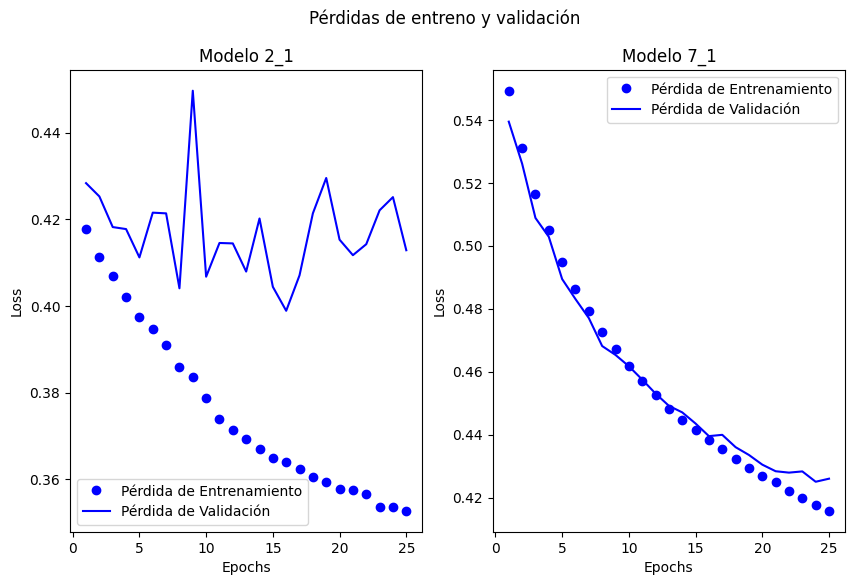

In [155]:
size = (10,6) # regula el tamaño de las graficas

plt.subplot(121)
plt.plot(epochs, loss2, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss2, 'b', label='Pérdida de Validación')
plt.title('Modelo 2_1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.rcParams["figure.figsize"] = size
plt.subplot(122)
plt.plot(epochs, loss7, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss7, 'b', label='Pérdida de Validación')
plt.title('Modelo 7_1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.rcParams["figure.figsize"] = size
plt.suptitle('Pérdidas de entreno y validación')


plt.show()

Se observa que con los datos de entrenamiento las funciones de pérdida son muy similares, sin embargo, con los datos de validación claramente el modelo 2 funciona mucho peor que el modelo 7. Se observa que en el modelo 2 hay una divergencia entre la pérdida de entrenamiento y validación bastante alta y , sin embargo, en el modelo 7 las pérdidas entre el modelo y la validación son similares.

A parte se aprecia como se produce sobreajuste en el modelo 2 a partir de la 3º iteración (algo que ya habíamos obsevado antes con 5 epochs con este modelo).

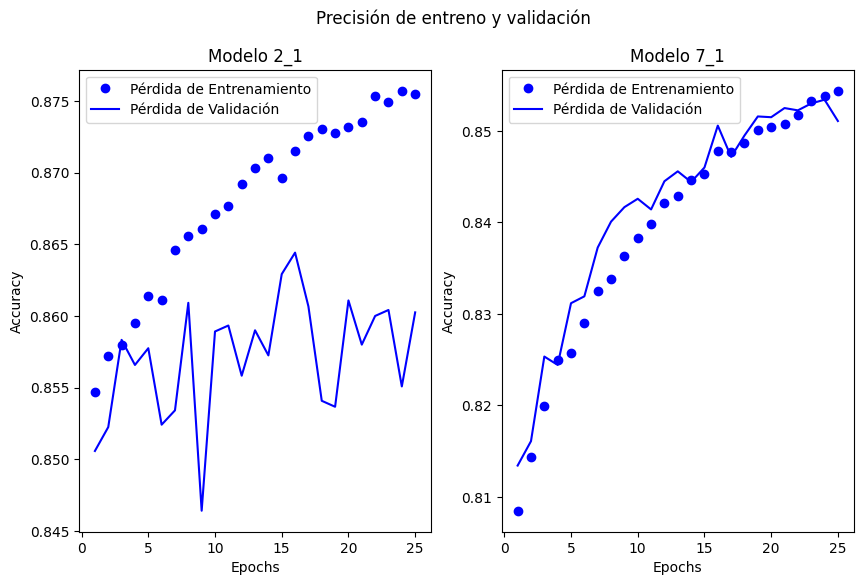

In [156]:
size = (10,6) # regula el tamaño de las graficas

plt.subplot(121)
plt.plot(epochs, acc2, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_acc2, 'b', label='Pérdida de Validación')
plt.title('Modelo 2_1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.rcParams["figure.figsize"] = size
plt.subplot(122)
plt.plot(epochs, acc7, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_acc7, 'b', label='Pérdida de Validación')
plt.title('Modelo 7_1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.rcParams["figure.figsize"] = size
plt.suptitle('Precisión de entreno y validación')


plt.show()

Con la precisión ocurre prácticamente lo mismo que con la pérdida y es que se ve como con los datos de entrenamiento el rendimiento de los modelos es muy parecido pero con los datos de validación vuelve a ser el modelo 7 el que presenta mayor precisión que el modelo 2. A parte, se vuelve a apreciar como la precisión que muestra el modelo 7 con los datos de entrenamiento y con los de validación vuelve a ser muy parecido lo que nos quiere decir que es este modelo el que es capaz de generalizar mejor nueva información.

###Cuestión 4
Evaluar cada uno de los 8 modelos comparando el rendimiento del modelo en
el conjunto de datos de prueba

In [157]:
# Verificamos los distintos modelos contra el conjunto de pruebas
test_loss = []
test_accuracy = []
for caso in range(casos):
  x = models[caso].evaluate(test_data, test_labels)
  test_loss.append(x[0])
  test_accuracy.append(x[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3805 - accuracy: 0.8676


Para comparar los 8 modelos se imprime una tabla con la pérdida y la precisión estimada de cada uno y se ordenan en función de estos.

Para la ordenación en función de la pérdida se ordenan de menor a mayor ya que cuanto menor sea esta menor serán las distancias entre los valores reales y los predecidos y mayor rendimiento ofrecerá el modelo, sin embargo, en función de la precisión es lo opuesto y, por tanto, se ordenan los modelos de mayor a menor.

In [158]:
data = {'Caso':['Caso1', 'Caso2', 'Caso3', 'Caso4', 'Caso5', 'Caso6', 'Caso7', 'Caso8'],
        'Loss': [test_loss[0], test_loss[1], test_loss[2], test_loss[3], test_loss[4], test_loss[5], test_loss[6], test_loss[7]],
        'Accuracy':[test_accuracy[0], test_accuracy[1], test_accuracy[2], test_accuracy[3], test_accuracy[4], test_accuracy[5], test_accuracy[6], test_accuracy[7]]}

df = pd.DataFrame(data)
print(df)

    Caso      Loss  Accuracy
0  Caso1  0.524797    0.8163
1  Caso2  0.445312    0.8499
2  Caso3  0.793695    0.7423
3  Caso4  0.468340    0.8386
4  Caso5  0.452081    0.8418
5  Caso6  0.352467    0.8805
6  Caso7  0.455320    0.8371
7  Caso8  0.380494    0.8676


In [159]:
#Ordenación en función de la pérdida
df_loss = df.sort_values(by = 'Loss', ascending = True)
print(df_loss)

    Caso      Loss  Accuracy
5  Caso6  0.352467    0.8805
7  Caso8  0.380494    0.8676
1  Caso2  0.445312    0.8499
4  Caso5  0.452081    0.8418
6  Caso7  0.455320    0.8371
3  Caso4  0.468340    0.8386
0  Caso1  0.524797    0.8163
2  Caso3  0.793695    0.7423


Se observa que son de nuevo los modelos 8 y 6 los que ofrecen una menor pérdida con los datos de test. Además también se aprecia como los modelos con gran número de neuronas en la primera capa tienen menor pérdida que los modelos con menor número de neuronas en la 1º capa lo que nos hace concluir que el número de neuronas está influyendo a la hora de minimizar la pérdida. Por contra los modelos 1 y 3 son los que están ofreciendo una mayor pérdida que el resto. Además se hace muy notable la pérdida que ofrece el modelo 3 frente al resto de modelos siendo su pérdida bastante más elevada que la que le precede, en este caso, la del modelo 7.

In [160]:
#Ordenación en función de la precisión
df_acc = df.sort_values(by = 'Accuracy', ascending = False)
print(df_acc)

    Caso      Loss  Accuracy
5  Caso6  0.352467    0.8805
7  Caso8  0.380494    0.8676
1  Caso2  0.445312    0.8499
4  Caso5  0.452081    0.8418
3  Caso4  0.468340    0.8386
6  Caso7  0.455320    0.8371
0  Caso1  0.524797    0.8163
2  Caso3  0.793695    0.7423


En cuanto a la precisión los modelos con mayor `accuracy` vuelven a ser los modelos 8 y 6 y se vuelve a observar que son los modelos con mayor número de neuronas en la 1º capa los que ofrecen mayor precisión que los modelos con menor número de neuronas en la 1º capa. Además vuelven a ser los modelos 1 y 3 los que vuelven a ofrecer una peor precisión que el resto de modelos.

###Cuestion 5 y 6


5.   Usar cada uno de los 8 modelos para hacer predicciones sobre la 6ª imagen de test `(test_images[5])`  
6.   Utilice el siguiente código para graficar cómo de bien o de mal se comporta el modelo para cada uno de los 8 casos  




En primer lugar, para observar el comportamiento de cada uno de los modelos se grafican las 10 primeras imágenes de cada uno de ellos así como los tipos de predicciones (correctas e incorrectas) que realizan nuestros 8 modelos distintos. Para esto último, se tiene en cuenta la matriz de confusión donde podemos ver los VP (verdaderos positivos), VN (verdaderos negativos), FP (falsos positivos), FN (falsos negativos)..

Después, con un objetivo de poder comparar todos los modelos en conjunto, se grafica únicamente la 6º imagen de todos ellos.

In [161]:
# Predicciones de los modelos en el conjunto de datos de entrenamiento
predictions = []
for caso in range(casos):
  print("Caso:", caso + 1)
  pred = models[caso].predict(test_data)
  predictions.append(pred)

Caso: 1
313/313 [==============================] - 1s 2ms/step
Caso: 2
313/313 [==============================] - 1s 2ms/step
Caso: 3
313/313 [==============================] - 1s 2ms/step
Caso: 4
313/313 [==============================] - 1s 1ms/step
Caso: 5
313/313 [==============================] - 1s 2ms/step
Caso: 6
313/313 [==============================] - 1s 2ms/step
Caso: 7
313/313 [==============================] - 1s 2ms/step
Caso: 8
313/313 [==============================] - 1s 2ms/step


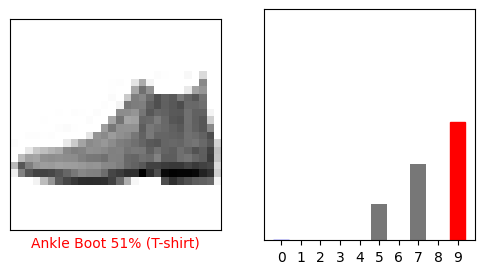

<Figure size 1000x600 with 0 Axes>

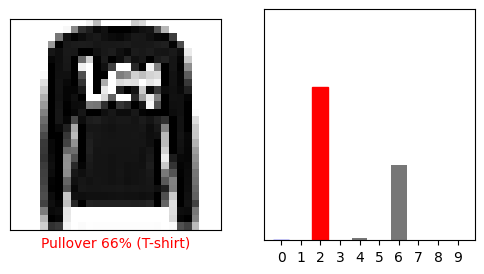

<Figure size 1000x600 with 0 Axes>

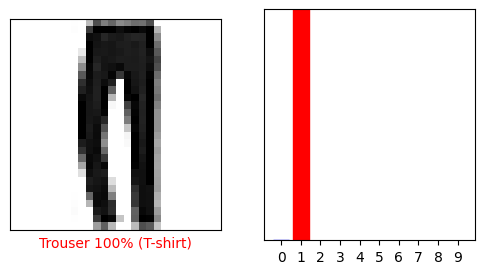

<Figure size 1000x600 with 0 Axes>

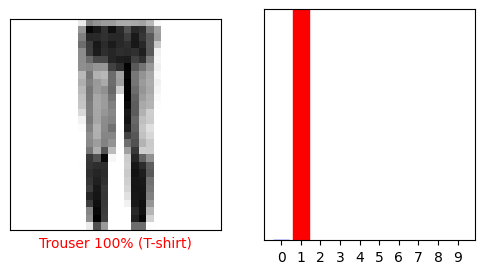

<Figure size 1000x600 with 0 Axes>

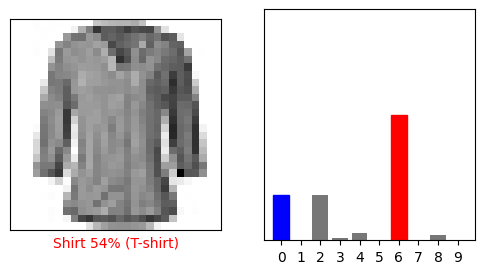

<Figure size 1000x600 with 0 Axes>

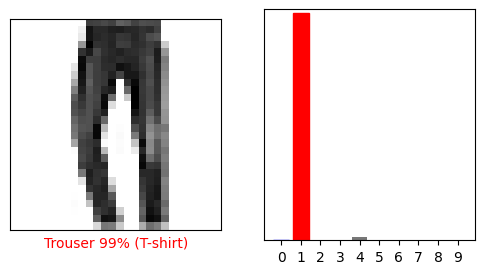

<Figure size 1000x600 with 0 Axes>

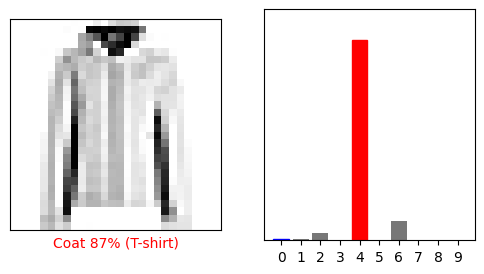

<Figure size 1000x600 with 0 Axes>

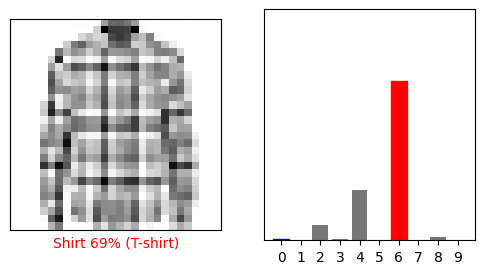

<Figure size 1000x600 with 0 Axes>

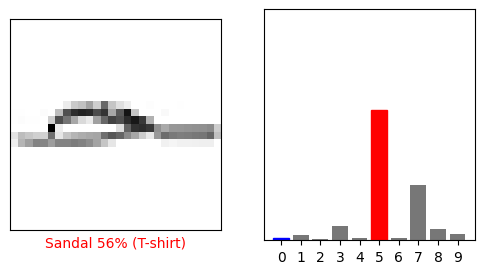

<Figure size 1000x600 with 0 Axes>

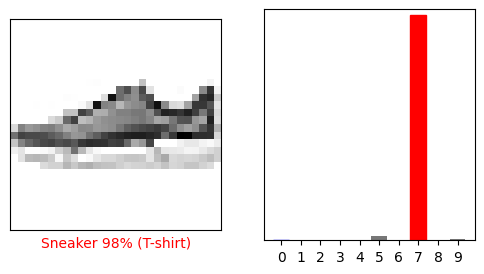

<Figure size 1000x600 with 0 Axes>

In [162]:
#Modelo 1
show_predicted_distributions(predictions[0], 10)

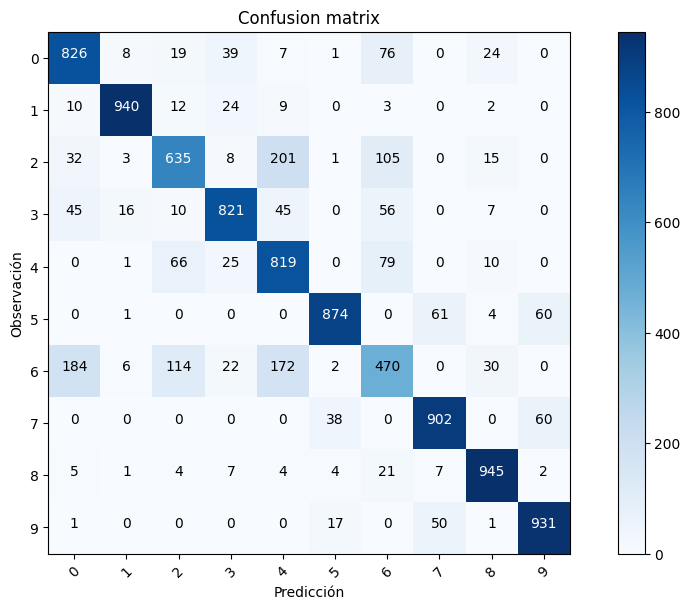

In [163]:
show_confusion_matrix(predictions[0])

Se observa que para los casos donde la imagen corresponde a una camiseta o a una sandalia la distribución de probabilidad esta más distribuida, es decir, el modelo no es capaz de diferenciarlas bien del todo (la probabilidad del elemento es alta pero no supone un % alto). Esto se debería estudiar más a fondo para ver si supone un error grande de acierto y si se puede mejorar dicho porcentaje. Una forma de mejora podría ser añadir más datos de entrenamiento de los grupos que fallan o aumentar el número de neuronas para aumentar los grados de libertad.

A parte de la matriz de confusion se puede ver que  elemento más confundido es el 6, es decir la camisa. La confunde tanto al intentar clasificarla como al intentar clasificar otras prendas, clasificando estas como camisas. En concreto, esto sucede con los elementos 0, 2 y 4 correspondientes a camisetas, jerseys y abrigos.

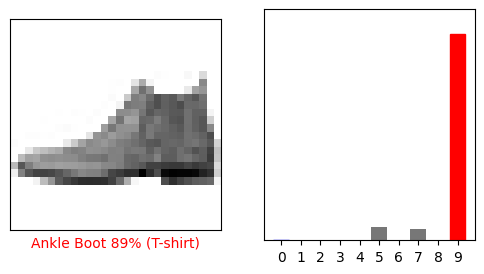

<Figure size 600x600 with 0 Axes>

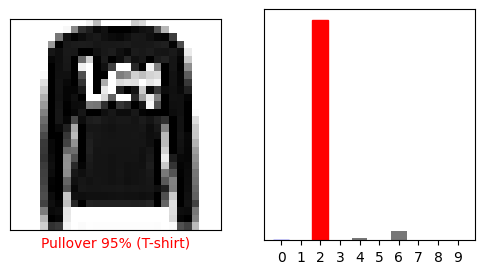

<Figure size 600x600 with 0 Axes>

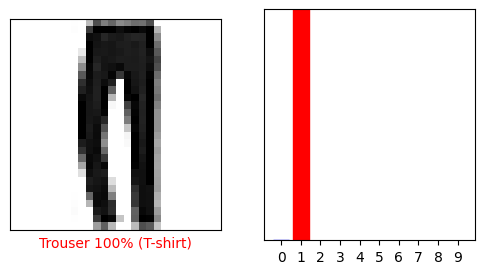

<Figure size 600x600 with 0 Axes>

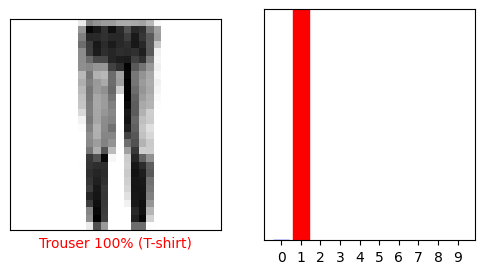

<Figure size 600x600 with 0 Axes>

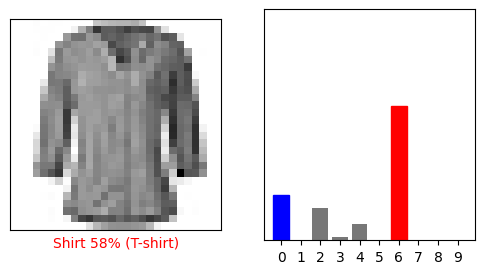

<Figure size 600x600 with 0 Axes>

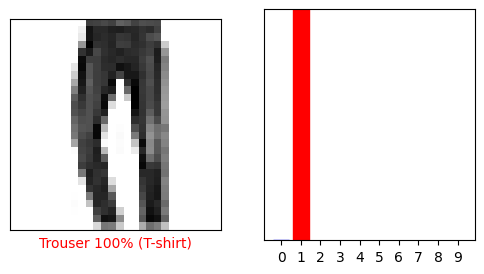

<Figure size 600x600 with 0 Axes>

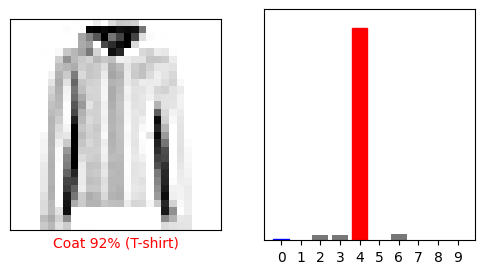

<Figure size 600x600 with 0 Axes>

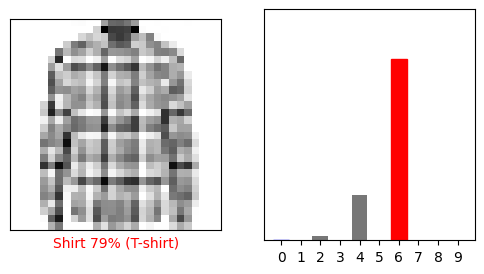

<Figure size 600x600 with 0 Axes>

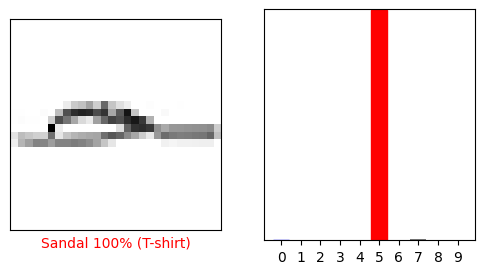

<Figure size 600x600 with 0 Axes>

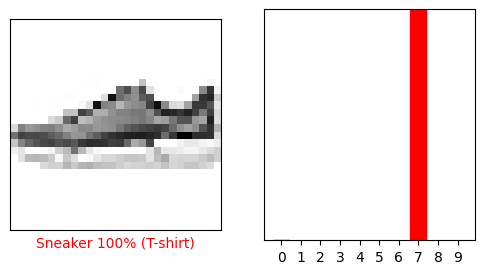

<Figure size 600x600 with 0 Axes>

In [164]:
#Modelo 2
show_predicted_distributions(predictions[1], 10)

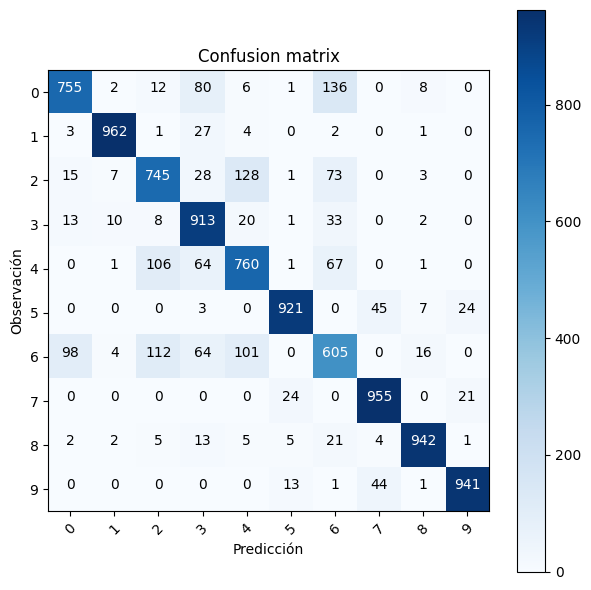

In [165]:
show_confusion_matrix(predictions[1])

Este modelo es capaz de predecir la mayoría de las imágentes con un porcentaje relativamente alto. Sin embargo, se observan problemas para catalogar correctamente imágenes de camisetas o botas ya que su distribución de probabilidad está mas repartida que en el resto de casos.

De la matriz de confusión se extrae que los grupos que más confunde son el 2, 4 y 6 (sudaderas, las camisas y abrigos) generalmente, por alguno de los mencionados. Esto nos indica que a la hora de diferenciar entre estos hay un porcentaje de que se confunda significante. Se debería tratar este problema más a fondo e intentar mejorar la precisión de estos elementos ya sea variando los hiperparámetros de la red neuronal, la distribución de datos (añadir más de estos grupos), etc.

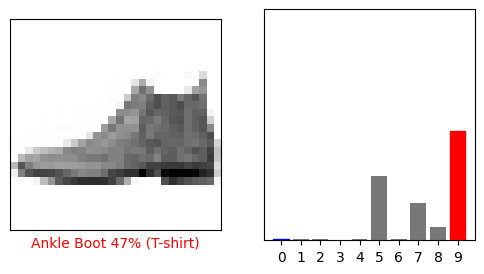

<Figure size 600x600 with 0 Axes>

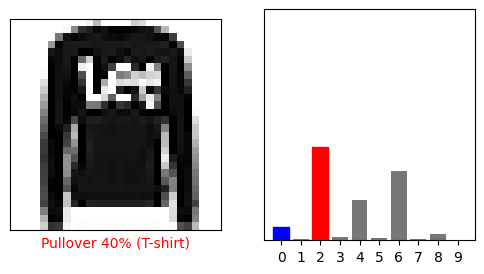

<Figure size 600x600 with 0 Axes>

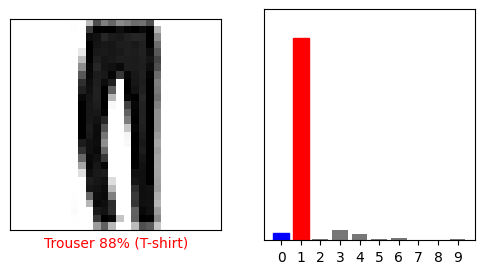

<Figure size 600x600 with 0 Axes>

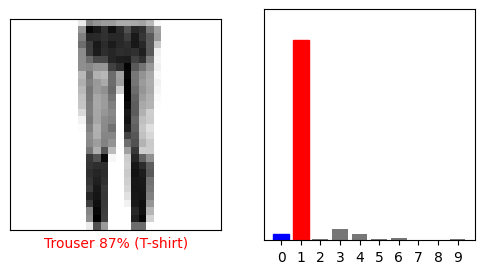

<Figure size 600x600 with 0 Axes>

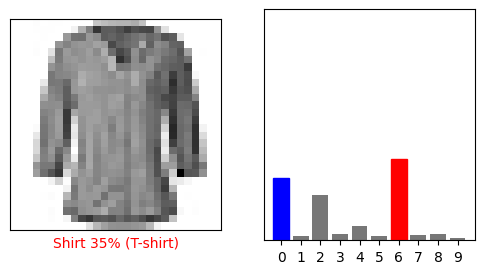

<Figure size 600x600 with 0 Axes>

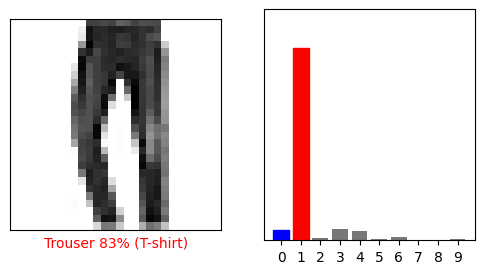

<Figure size 600x600 with 0 Axes>

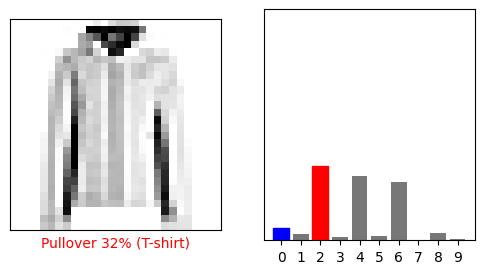

<Figure size 600x600 with 0 Axes>

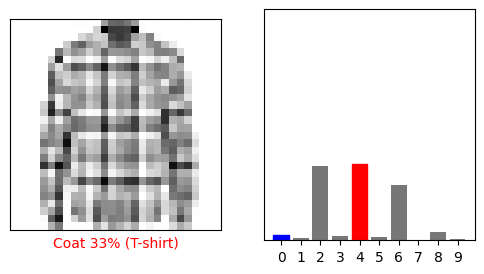

<Figure size 600x600 with 0 Axes>

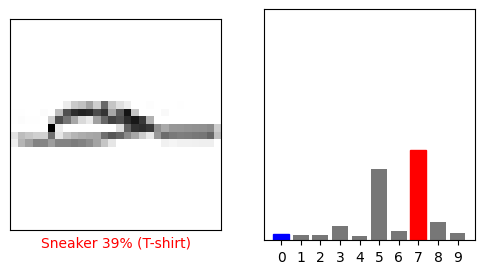

<Figure size 600x600 with 0 Axes>

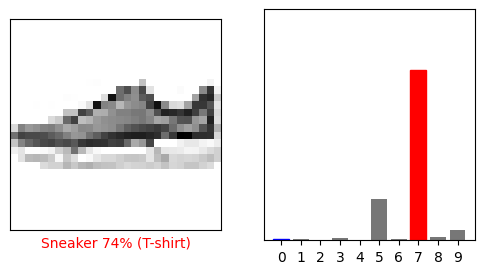

<Figure size 600x600 with 0 Axes>

In [166]:
#Modelo 3
show_predicted_distributions(predictions[2], 10)

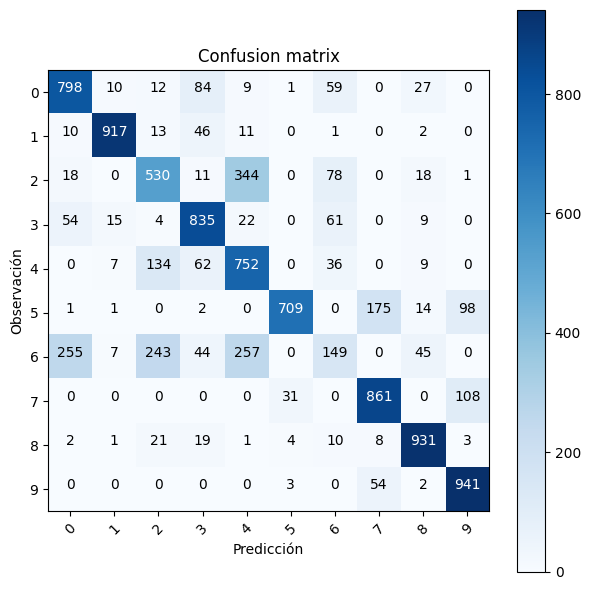

In [167]:
show_confusion_matrix(predictions[2])

Se observa como este modelo falla una gran cantidad de prendas. No obstante, se aprecia que los pantalones y los zapatos los sabe distinguir bien. La distribucion de probabilidad de aquellas prendas que falla es suave por lo que hay un gran nivel de confusion entre varias prendas.

De la matriz de confusión se puede ver que, al igual que las dos redes neuronales anteriores, donde más fallos se observan es a la hora de predecir el elemento 6, las camisas, las cuales confunde con camisetas, abrigos y jerseys. No obstante, el porcentaje de precisión de esta modelo es menor y por eso podemos ver que ha acertado menos de un décimo de las imágenes de camisas.

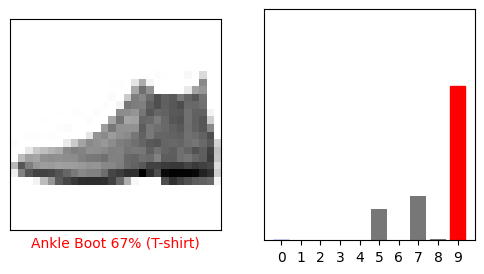

<Figure size 600x600 with 0 Axes>

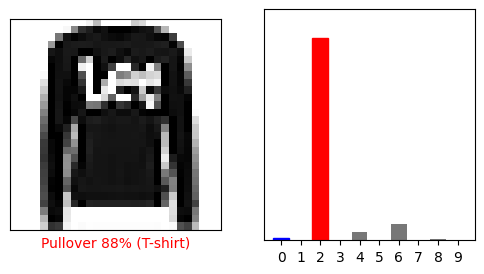

<Figure size 600x600 with 0 Axes>

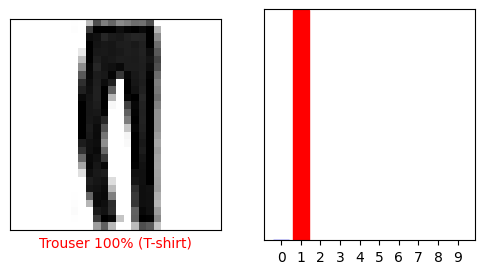

<Figure size 600x600 with 0 Axes>

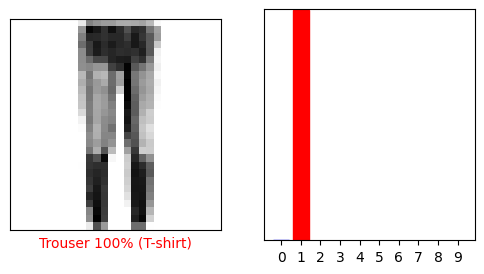

<Figure size 600x600 with 0 Axes>

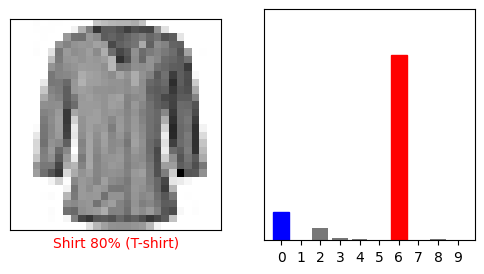

<Figure size 600x600 with 0 Axes>

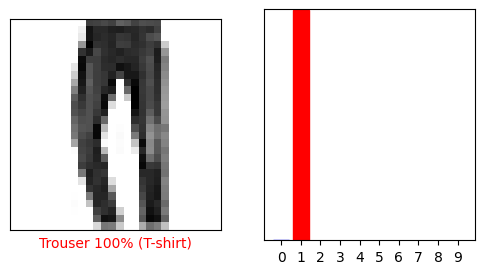

<Figure size 600x600 with 0 Axes>

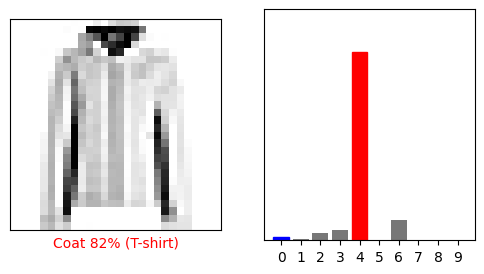

<Figure size 600x600 with 0 Axes>

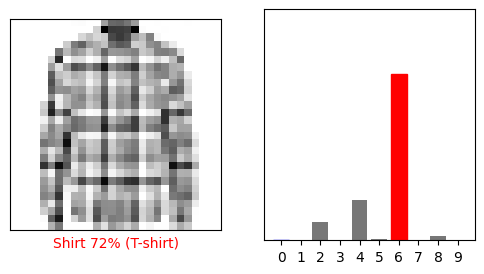

<Figure size 600x600 with 0 Axes>

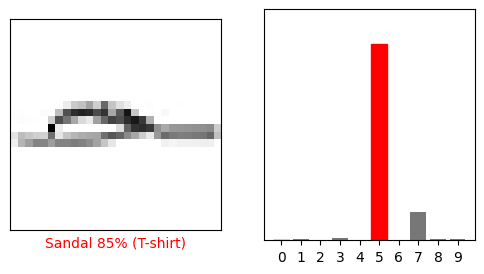

<Figure size 600x600 with 0 Axes>

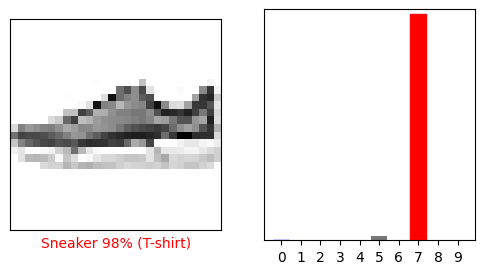

<Figure size 600x600 with 0 Axes>

In [168]:
#Modelo 4
show_predicted_distributions(predictions[3], 10)

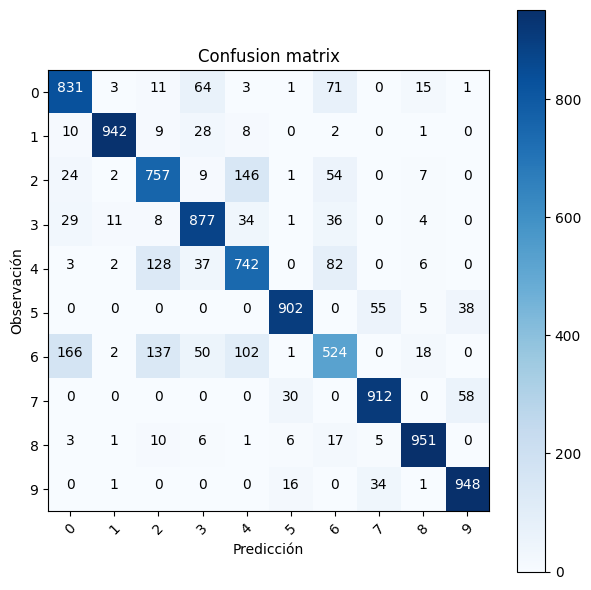

In [169]:
show_confusion_matrix(predictions[3])

Este modelo consigue acertar todas las prendas con mas de un 75%; salvo la camisa y la bota. Una forma de mejorar este error seria aumentar la cantidad de imagenes de camisas y botas en la fase de entrenamiento para que aprenda a distinguir las prendas mejor o intentar descifrar porque se produce este error. Por ejemplo, aumentando la calidad de las imágenes introducidas.

En la matriz de confusion vemos que hay ciertos elementos que no distingue correctamente, en concreto el que menos acierta es el elemento 6. Este modelo no es capaz de diferenciar correctamente camisas de jerseys, abrigos y camisetas. Se ve que esto es un problema recurrente y que debería ser tratado en un trabajo futuro.

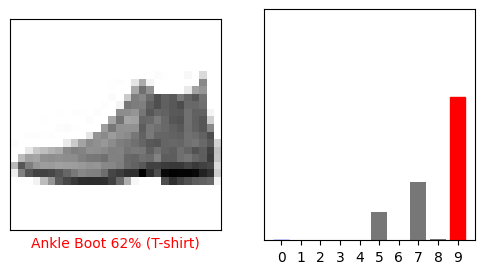

<Figure size 600x600 with 0 Axes>

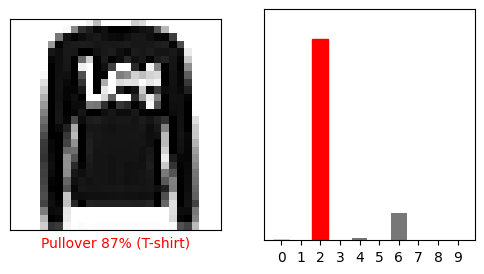

<Figure size 600x600 with 0 Axes>

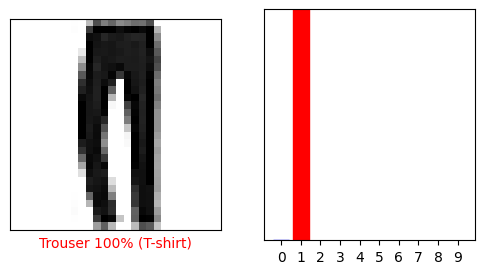

<Figure size 600x600 with 0 Axes>

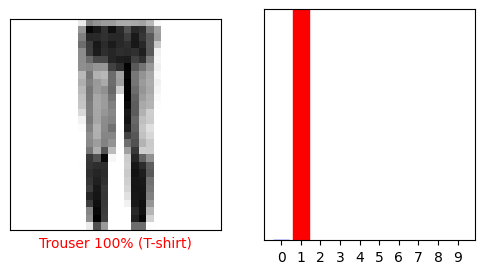

<Figure size 600x600 with 0 Axes>

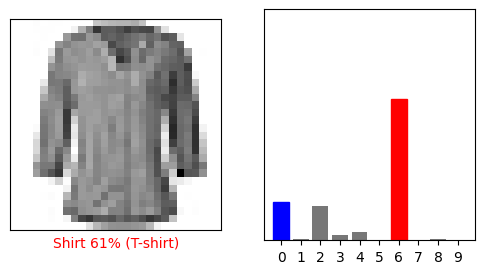

<Figure size 600x600 with 0 Axes>

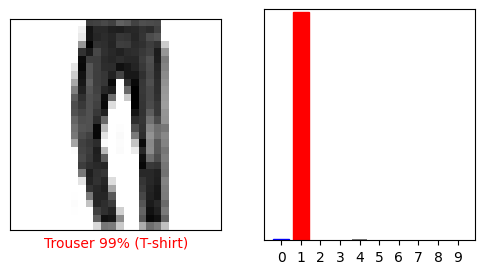

<Figure size 600x600 with 0 Axes>

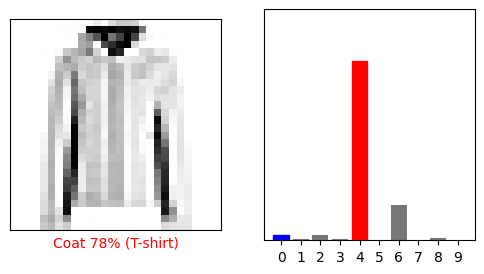

<Figure size 600x600 with 0 Axes>

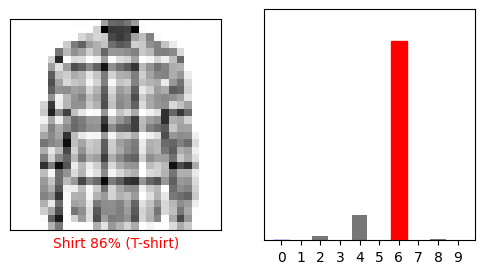

<Figure size 600x600 with 0 Axes>

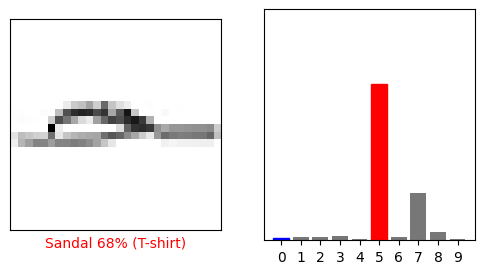

<Figure size 600x600 with 0 Axes>

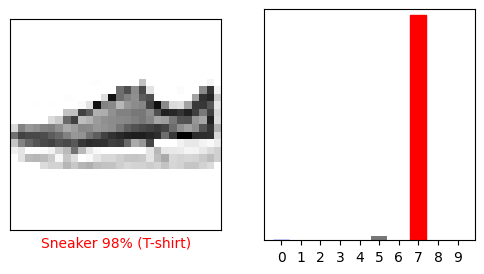

<Figure size 600x600 with 0 Axes>

In [170]:
#Modelo 5
show_predicted_distributions(predictions[4], 10)

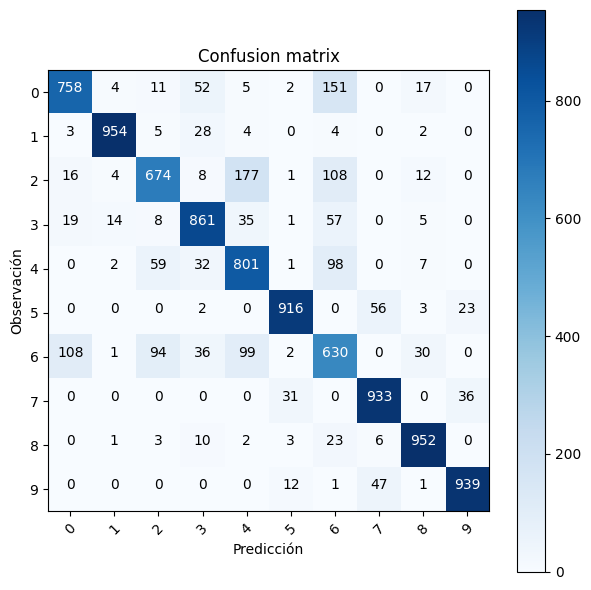

In [171]:
show_confusion_matrix(predictions[4])

Este modelo en su gran mayoria acierta todas las prendas con mas de un 75%.Se observa que confunde prendas como camisas con camisteas o zapatos con sandalias lo que intuituvamente tiene sentido porque son objetos parecidos en forma por lo cual se crea confusion a la red. Una forma de mejorar este error seria aumentar la cantidad de imagenes de sandalias y zapatos en la fase de entrenamiento para que aprenda a distinguir las prendas mejor.

En la matriz de confusion se ve que hay ciertos elementos que no distingue correctamente pero al no ser confusiones drasticas se da la red como valida. Es interesante resaltar que las camisas, camisetas y abrigos se confunden entre si. La mayor ocurriencia ocurre con las camisas con jerseys, camisetas y abrigos; aunque es menor para las camisteas seguramente, dada su aucencia de mangas.

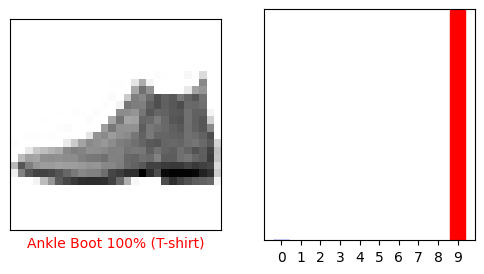

<Figure size 600x600 with 0 Axes>

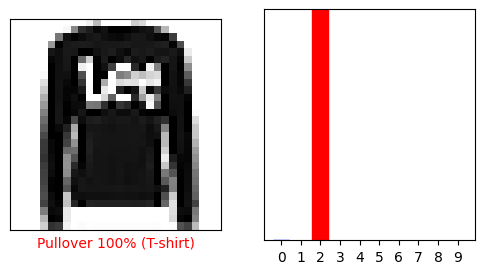

<Figure size 600x600 with 0 Axes>

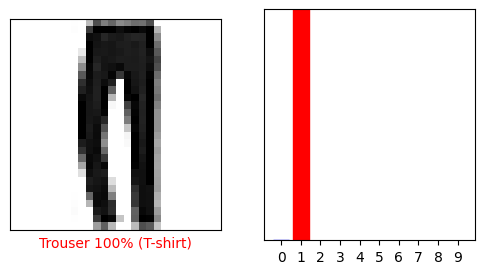

<Figure size 600x600 with 0 Axes>

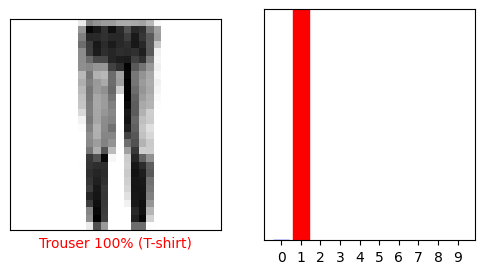

<Figure size 600x600 with 0 Axes>

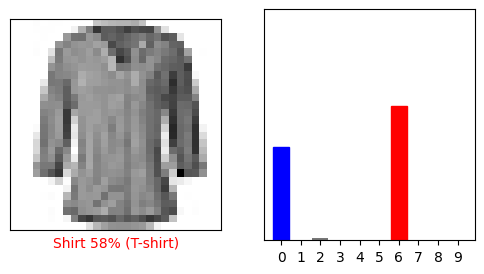

<Figure size 600x600 with 0 Axes>

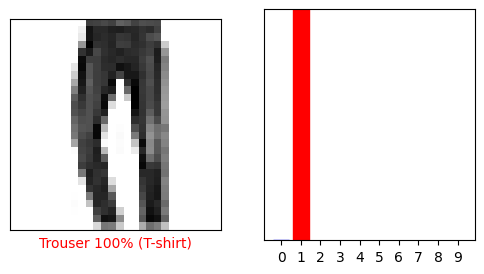

<Figure size 600x600 with 0 Axes>

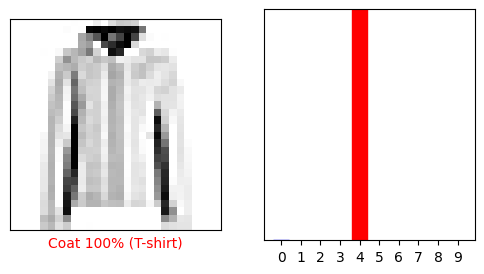

<Figure size 600x600 with 0 Axes>

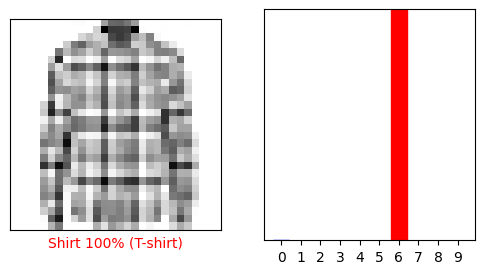

<Figure size 600x600 with 0 Axes>

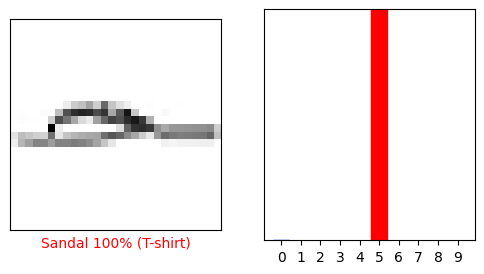

<Figure size 600x600 with 0 Axes>

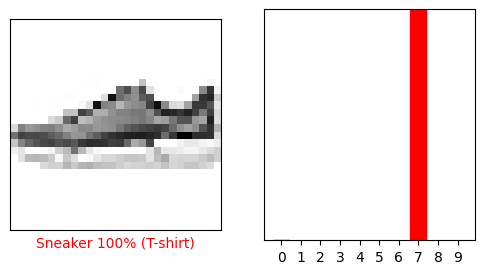

<Figure size 600x600 with 0 Axes>

In [172]:
#Modelo 6
show_predicted_distributions(predictions[5], 10)

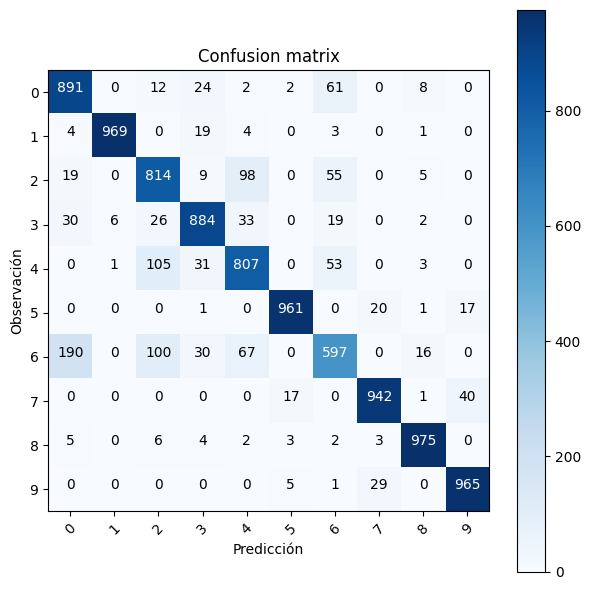

In [173]:
show_confusion_matrix(predictions[5])

Este modelo ofrece un porcentaje de acierto prácticamente del 100% en su mayoría de casos salvo en la imagen de la camisa la cual la cataloga como una camiseta. Una forma de mejorar este error seria aumentar la cantidad de imagenes de camisetas y camisas en la fase de entrenamiento para que aprenda a distinguir las prendas mejor.

En la matriz de confusion vemos que, como viene pasando en los anteriores modelos,  el elemento que mas confunde son las camisas confundiendola por camisetas, abrigos y sudaderas. Es interesante ver como este error se propaga a todos los modelos a paser de su precisión. Esto puede deberse a que estas prendas son muy parecidas y debido a la baja calidad de la imágen la red no es capaz de determinar rasgos claros que diferencien dichas prendas.

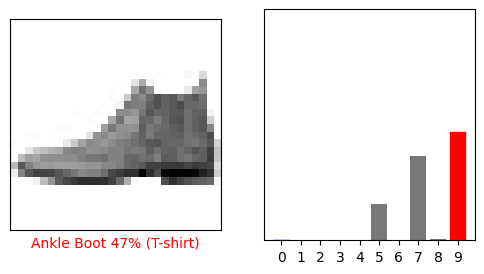

<Figure size 600x600 with 0 Axes>

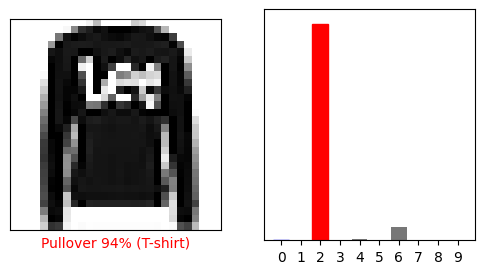

<Figure size 600x600 with 0 Axes>

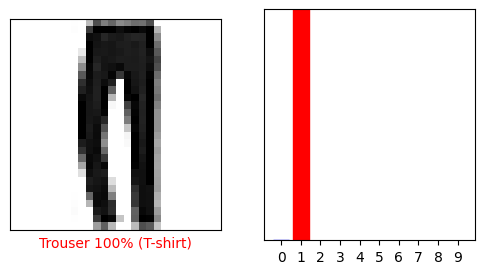

<Figure size 600x600 with 0 Axes>

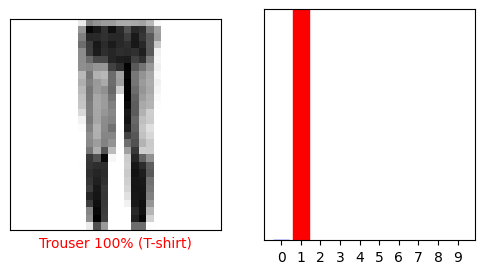

<Figure size 600x600 with 0 Axes>

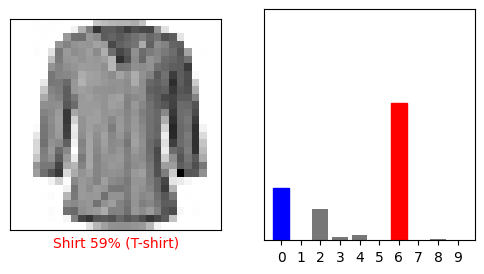

<Figure size 600x600 with 0 Axes>

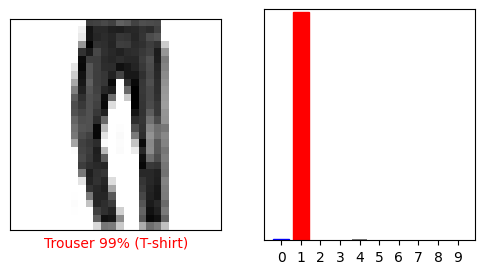

<Figure size 600x600 with 0 Axes>

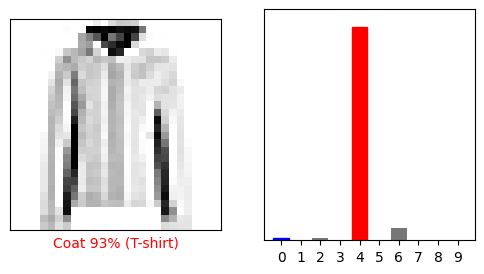

<Figure size 600x600 with 0 Axes>

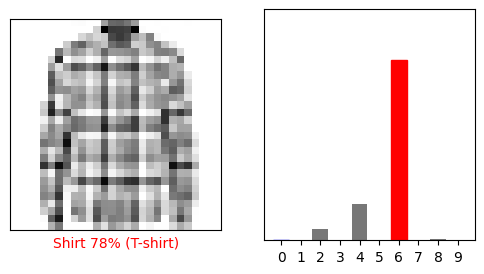

<Figure size 600x600 with 0 Axes>

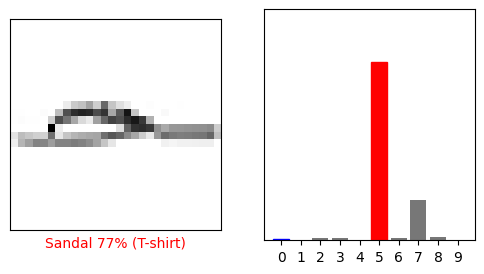

<Figure size 600x600 with 0 Axes>

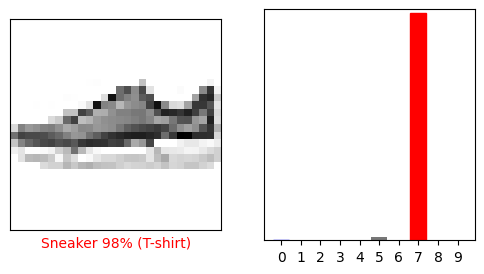

<Figure size 600x600 with 0 Axes>

In [174]:
#Modelo 7
show_predicted_distributions(predictions[6], 10)

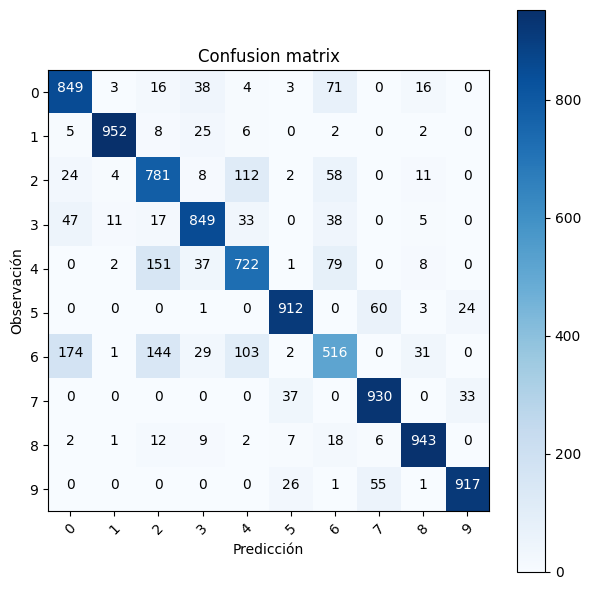

In [175]:
show_confusion_matrix(predictions[6])

Se puede observar que el modelo 7 tiene dificultades principalmente para distinguir entre topos de calzados, es decir, zapatillas, botas y sandalias.
Además, también le cuesta un poco diferenciar algunas prendas superiores como camisas y abrigos.
Por otro lado, distingue bastante bien otras prendas como pantalones, jerseys.

En la matriz de confusión se vuelve a observar lo comentado en modelos anteriores apreciando tambien un error mas o menos significante a la hora de clasificar zapatillas y sandalias. Esto último podría ser trascendente si quisieramos implementar este modelo en, por ejemplo, una web de zapatillas.

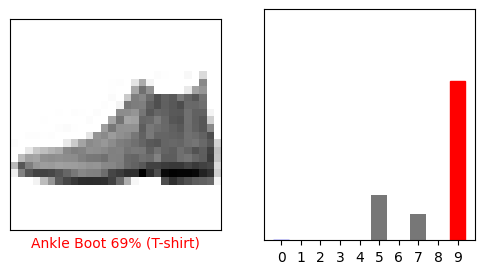

<Figure size 600x600 with 0 Axes>

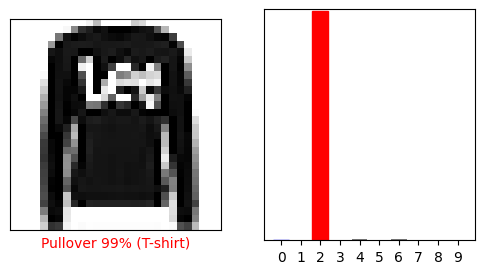

<Figure size 600x600 with 0 Axes>

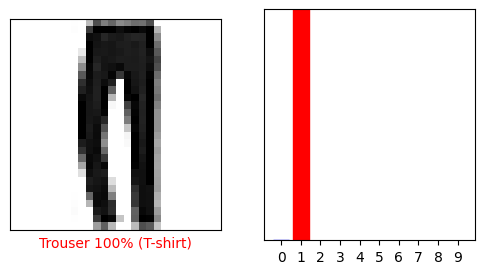

<Figure size 600x600 with 0 Axes>

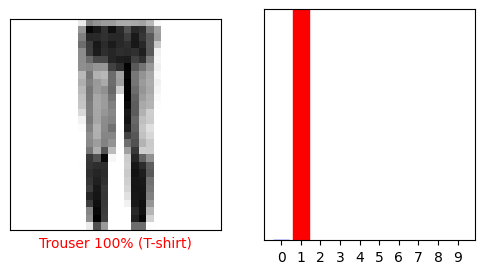

<Figure size 600x600 with 0 Axes>

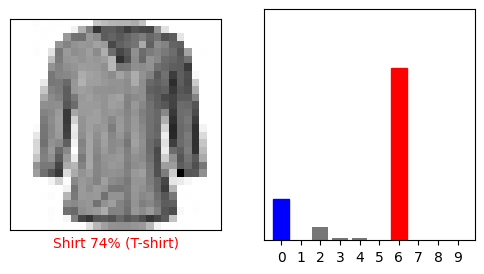

<Figure size 600x600 with 0 Axes>

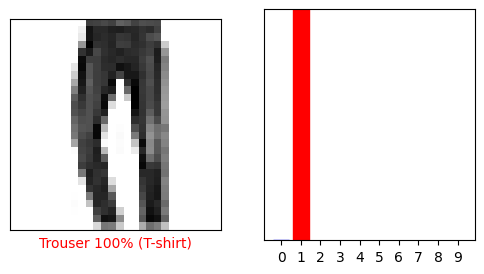

<Figure size 600x600 with 0 Axes>

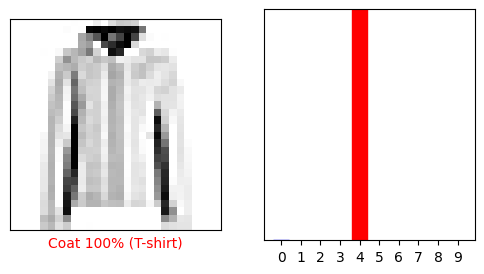

<Figure size 600x600 with 0 Axes>

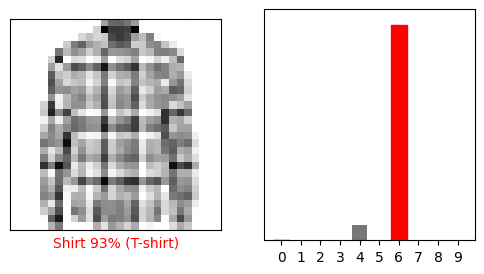

<Figure size 600x600 with 0 Axes>

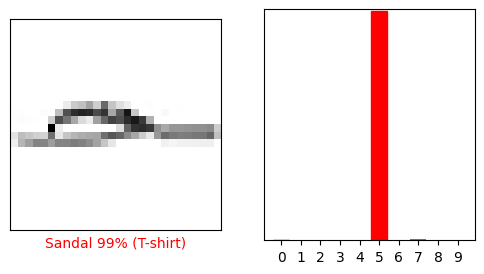

<Figure size 600x600 with 0 Axes>

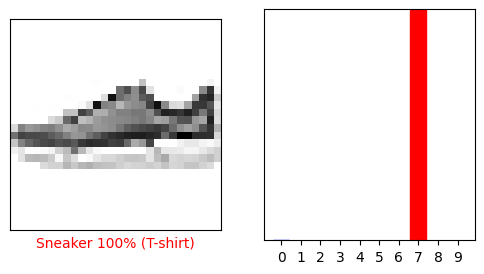

<Figure size 600x600 with 0 Axes>

In [176]:
#Modelo 8
show_predicted_distributions(predictions[7], 10)

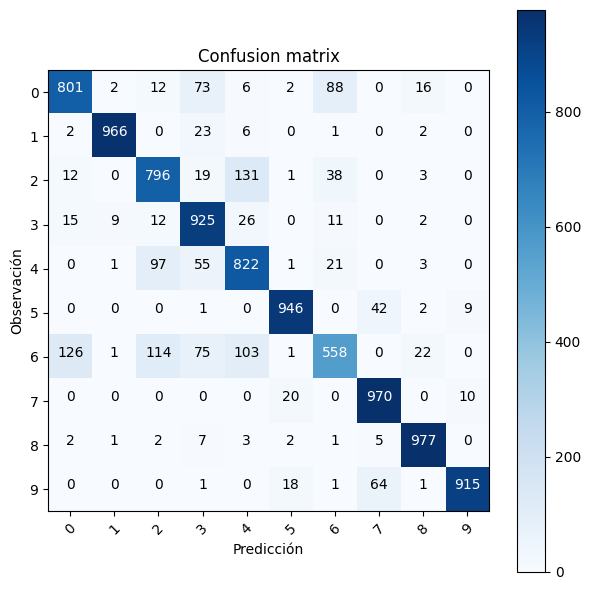

In [177]:
show_confusion_matrix(predictions[7])

Se observa que este modelo cuenta con una gran precisión para distinguir las distintas prendas, excepto por camisas y las botas como se ha comprobado en la mayoría de modelos anteriores.

En la matriz de confusión se vuelve a observar lo comentado en modelos anteriores aunque en este con una menor frecuencia.



Modelo 1


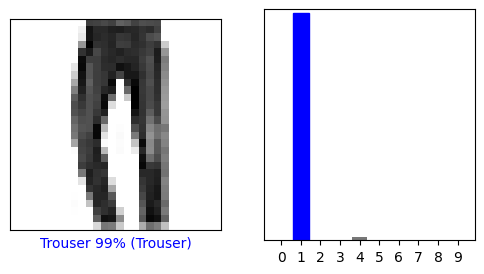



Modelo 2


<Figure size 600x600 with 0 Axes>

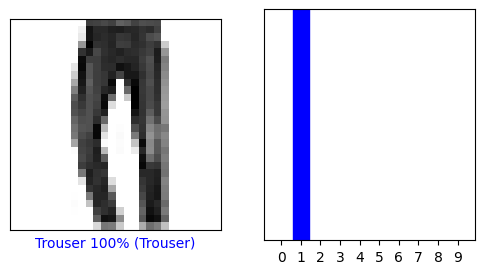



Modelo 3


<Figure size 600x600 with 0 Axes>

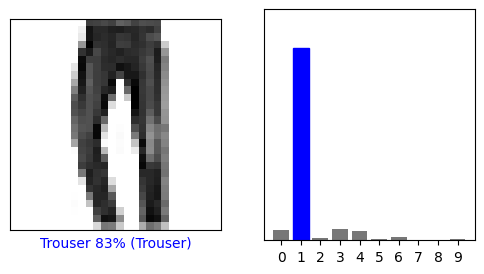



Modelo 4


<Figure size 600x600 with 0 Axes>

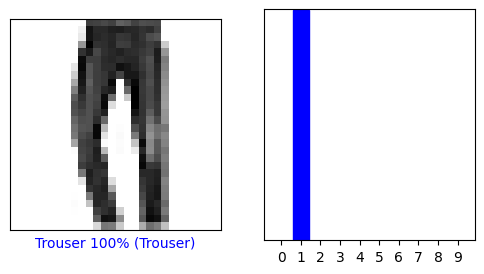



Modelo 5


<Figure size 600x600 with 0 Axes>

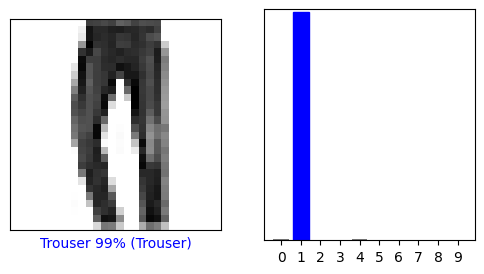



Modelo 6


<Figure size 600x600 with 0 Axes>

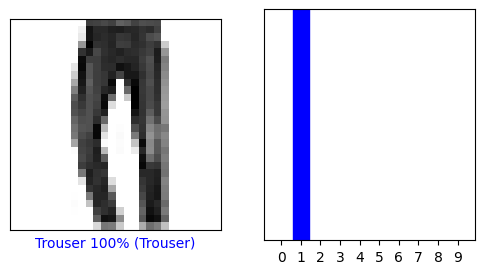



Modelo 7


<Figure size 600x600 with 0 Axes>

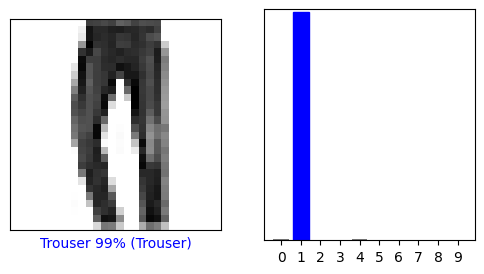



Modelo 8


<Figure size 600x600 with 0 Axes>

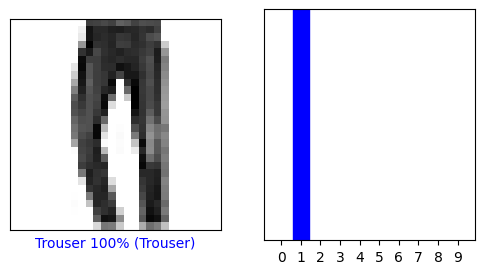

<Figure size 600x600 with 0 Axes>

In [178]:
# Graficación de la 6º imagen en todos los modelos
for caso in range(casos):
  print("\n")
  print("Modelo", caso + 1)
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(5, predictions[caso][5], test_labels, test_data.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(5, predictions[caso][5],  test_labels)
  plt.show()
  plt.clf()

Con la idea de poder comparar todos los modelos entre ellos se ha graficado la 6º imagen de cada uno la cual corresponde a unos pantalones.

Se observa que los modelos 2, 6 y 8 han sido los únicos capaces de catalogar en todos los casos correctamente la imagen (porcentaje de acierto del 100%).

Después aparecen los modelos 1, 4, 5, y 7 con un porcentaje de acierto superior al 95%. Se aprecia que en los únicos casos donde no son capaces de catalogar correctamente la imagen es porque la confunden con un abrigo. Esto último puede deberse a la nitidez de la imagen la cual no se percibe como la más óptima.

Por último aparece el modelo 3 con un porcentaje de acierto bastante inferior al del resto de modelos lo que nos indica que su funcionamiento para catalogar pantalones no está siendo el más óptimo con respecto a los demás.



###Cuestión 7
Mejore el modelo usando el de la configuración del caso 3, pero cambiando el
optimizador por ‘adam’ y la función de pérdida
‘sparse_categorical_crossentropy’. Buscar en internet las bases de dicho
optimizador y función de pérdida, explícalos con tus propias palabras y plantea
tus reflexiones respecto al resultado.

####Marco Teórico:

`ADAM` (ADAptative Moment Estimation) es un optimizador que utiliza el algoritmo Adam, un algoritmo dedicado a la optimización del descenso de gradiente.
La peculiaridad de Adam es que combina las ventajas de otros dos optimizadores. Específicamente de:
*   Algoritmo de gradiente adaptativo (`AdaGrad`) en el cual se utilizan diferentes tasas de aprendizaje para las variables teniendo en cuenta el gradiente acumulado en cada una de ellas.
*   Propagación de raíz cuadrática media (`RMSProp`) en el cual en lugar de mantener un acumulado de los gradientes, se utiliza el concepto de "ventana" para considerar solo los gradientes más recientes.

Específicamente, el algoritmo Adam calcula un promedio móvil exponencial del gradiente y el gradiente cuadrático, y los parámetros beta1 y beta2, de los cuales hablaremos a continuación, controlan las tasas de caída de estos promedios móviles.

Hiperparámetros de configuración de Adam:

*   Alfa: ritmo de aprendizaje. La proporción en que se actualizan los pesos. Valor por defecto: 0.001.
*   beta1. La tasa de caída exponencial para las estimaciones del primer momento. Valor por defecto: 0.9.
*   beta2. La tasa de caída exponencial para las estimaciones del segundo momento. Valor por defecto: 0.999.
*   épsilon. Es un número muy pequeño para evitar cualquier división por cero en la implementación. Valor por defecto: 1e-07.

Fundamentos Matemáticos de ADAM:
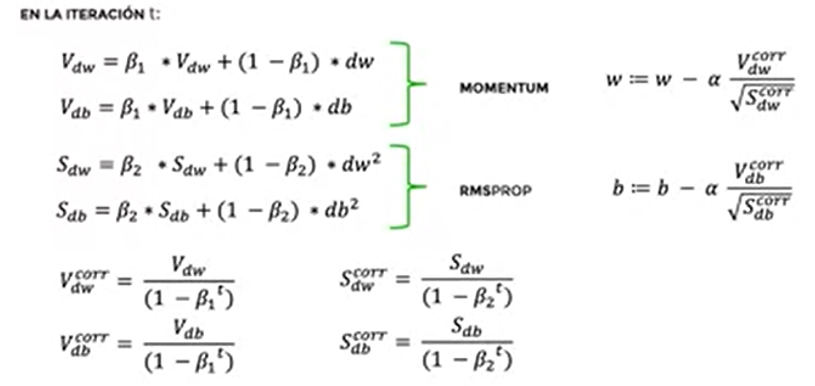

Imagen sacada de [Coursera](https://es.coursera.org/lecture/optimizacin-de-redes-neuronales-profundas/rmsprop-adam-FzzL3)

`Sparse Categorical Cross Entropy` es una función de pérdida para modelos de clasificación de clases múltiples donde a la etiqueta de salida se le asigna un valor entero. La función de pérdida se utiliza para calcular la cantidad que el modelo debe tratar de minimizar durante el proceso de entrenamiento. Una red entrenada será aquella que sea capaz de minimizar el loss score, el valor que determina la loss function.

Para ello utiliza la siguiente fórmula la cual calcula la pérdida de entropía cruzada entre las etiquetas y las predicciones del modelo.


$L_{_i}=- \sum_{j} y_{i,j}*log(y_{i,j})$



#### Implementación en la red:

In [179]:
# Se vuelven a preprocesar los datos para la implemntación del nuevo modelo
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = train_data/255.0
x_val = train_data[:12000]
train_data_p = train_data[12000:]

y_val = train_labels[:12000]
train_labels_p = train_labels[12000:]
# Arquitectura de la red
modelo9 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(10, activation="sigmoid"),
                              tf.keras.layers.Dense(10, activation="softmax")
])


# Definimos Optimizador, Función de Perdida y Metrica:
modelo9.compile(optimizer = "adam",
               loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics = ['accuracy'])
modelo9.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_34 (Flatten)        (None, 784)               0         
                                                                 
 dense_68 (Dense)            (None, 10)                7850      
                                                                 
 dense_69 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [180]:
# Entrenamos el modelo
history9 = modelo9.fit(train_data_p,
                     train_labels_p,
                     epochs = 5,
                     validation_data = (x_val, y_val))

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 1.1233 - accuracy: 0.6753 - val_loss: 0.7439 - val_accuracy: 0.7787
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6286 - accuracy: 0.8061 - val_loss: 0.5649 - val_accuracy: 0.8174
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5205 - accuracy: 0.8286 - val_loss: 0.5103 - val_accuracy: 0.8268
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4742 - accuracy: 0.8385 - val_loss: 0.4724 - val_accuracy: 0.8395
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4468 - accuracy: 0.8453 - val_loss: 0.4535 - val_accuracy: 0.8413


Para analizar el rendimiento del modelo 3 con los nuevos parámetros se grafican sus funciones de pérdida y precisión y se comparan con las del modelo 3 definido anteriormente.

In [181]:
#Modelo 3
#Loss
loss3 = historys[2].history['loss']
val_loss3 = historys[2].history['val_loss']
#Accuracy
acc3 = historys[2].history['accuracy']
val_acc3 = historys[2].history['val_accuracy']
epochs = range(1, len(loss3) + 1)
#Modelo 9
#Loss
loss9 = history9.history['loss']
val_loss9 = history9.history['val_loss']
#Accuracy
acc9 = history9.history['accuracy']
val_acc9 = history9.history['val_accuracy']
epochs = range(1, len(loss9) + 1)

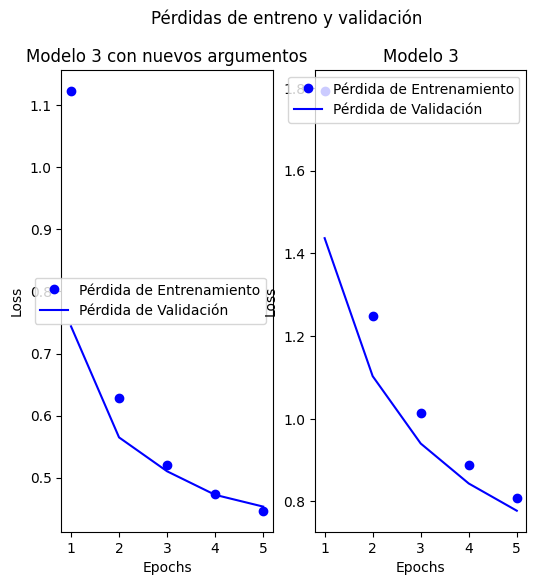

In [182]:
size = (10,6)
plt.subplot(121)
plt.plot(epochs, loss9, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss9, 'b', label='Pérdida de Validación')
plt.title('Modelo 3 con nuevos argumentos')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.rcParams["figure.figsize"] = size
plt.subplot(122)
plt.plot(epochs, loss3, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss3, 'b', label='Pérdida de Validación')
plt.title('Modelo 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.rcParams["figure.figsize"] = size
plt.suptitle('Pérdidas de entreno y validación')


plt.show()

Se observa que el uso de los nuevos parámetros ha mejorado muy considerablemente el rendimiento del modelo 3 y es que se puede ver como nuestro primer modelo a parte de tener una pérdida bastante elevada producía overfitting a partir de la 4 iteración y sin embargo, este nuevo modelo a parte de suplir este problema consigue adaptarse bastante bien a los datos de validación consiguiendo unos resultados muy similares a los obtenidos con los datos de entrenamiento.

En definitiva, este nuevo modelo 3 esta produciendo una menor pérdida que el anterior modelo 3 tanto en los datos de entrenamiento como en los datos de validación y además esta siendo capaz de generalizar mejor nueva información.

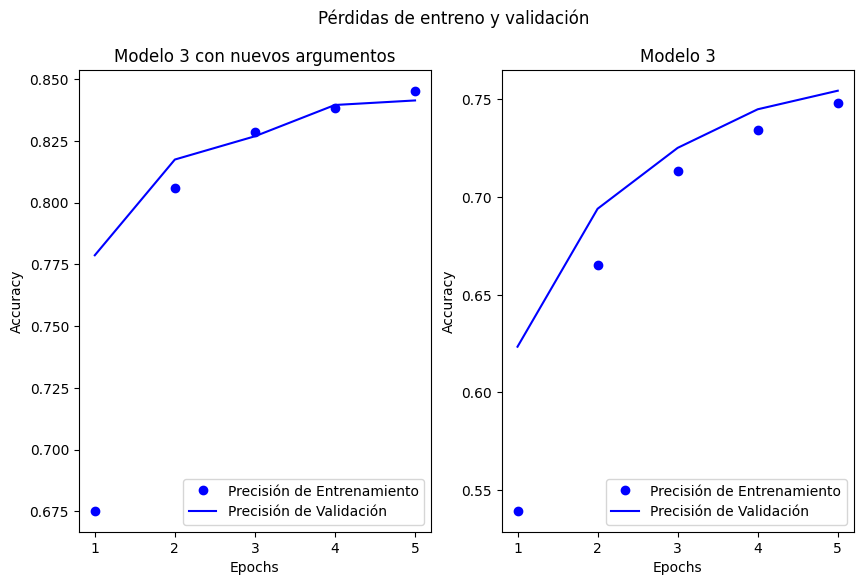

In [183]:
plt.clf()   # Limpiamos el gráfico

size = (10,6)
plt.subplot(121)
plt.plot(epochs, acc9, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc9, 'b', label='Precisión de Validación')
plt.title('Modelo 3 con nuevos argumentos')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.rcParams["figure.figsize"] = size
plt.subplot(122)
plt.plot(epochs, acc3, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc3, 'b', label='Precisión de Validación')
plt.title('Modelo 3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.rcParams["figure.figsize"] = size
plt.suptitle('Pérdidas de entreno y validación')


plt.show()

En cuanto a la precisión se vuelve a observar como la precisión obtenida por el nuevo modelo 3 vuelve a ser bastante superior a la obtenida por el anterior modelo.

Por tanto,  se concluye que el uso del  optimizador `adam` y de la nueva función de pérdida `sparse categorical cross entropy` han beneficiado considerablemente a la optimización del modelo.

##Conclusiones

En primer lugar se definen los valores mediante los cuales vamos a comparar los modelos. Estos son:
*  `Loss`: Se define la pérdida como la distancia entre las etiquetas y la predecida por el modelo. Cuanto mayor sea este valor, mayores serán los errores cometidos en los datos.

* `Accuracy`: La precisión muestra en forma de porcentaje como de bien responde tu modelo frente a los datos introducidos, es decir, mide el número de clases mal etiquetadas en un problema.

En las siguientes gráficas se comparan los indicadores anteriores frente a los 8 modelos propuestos.

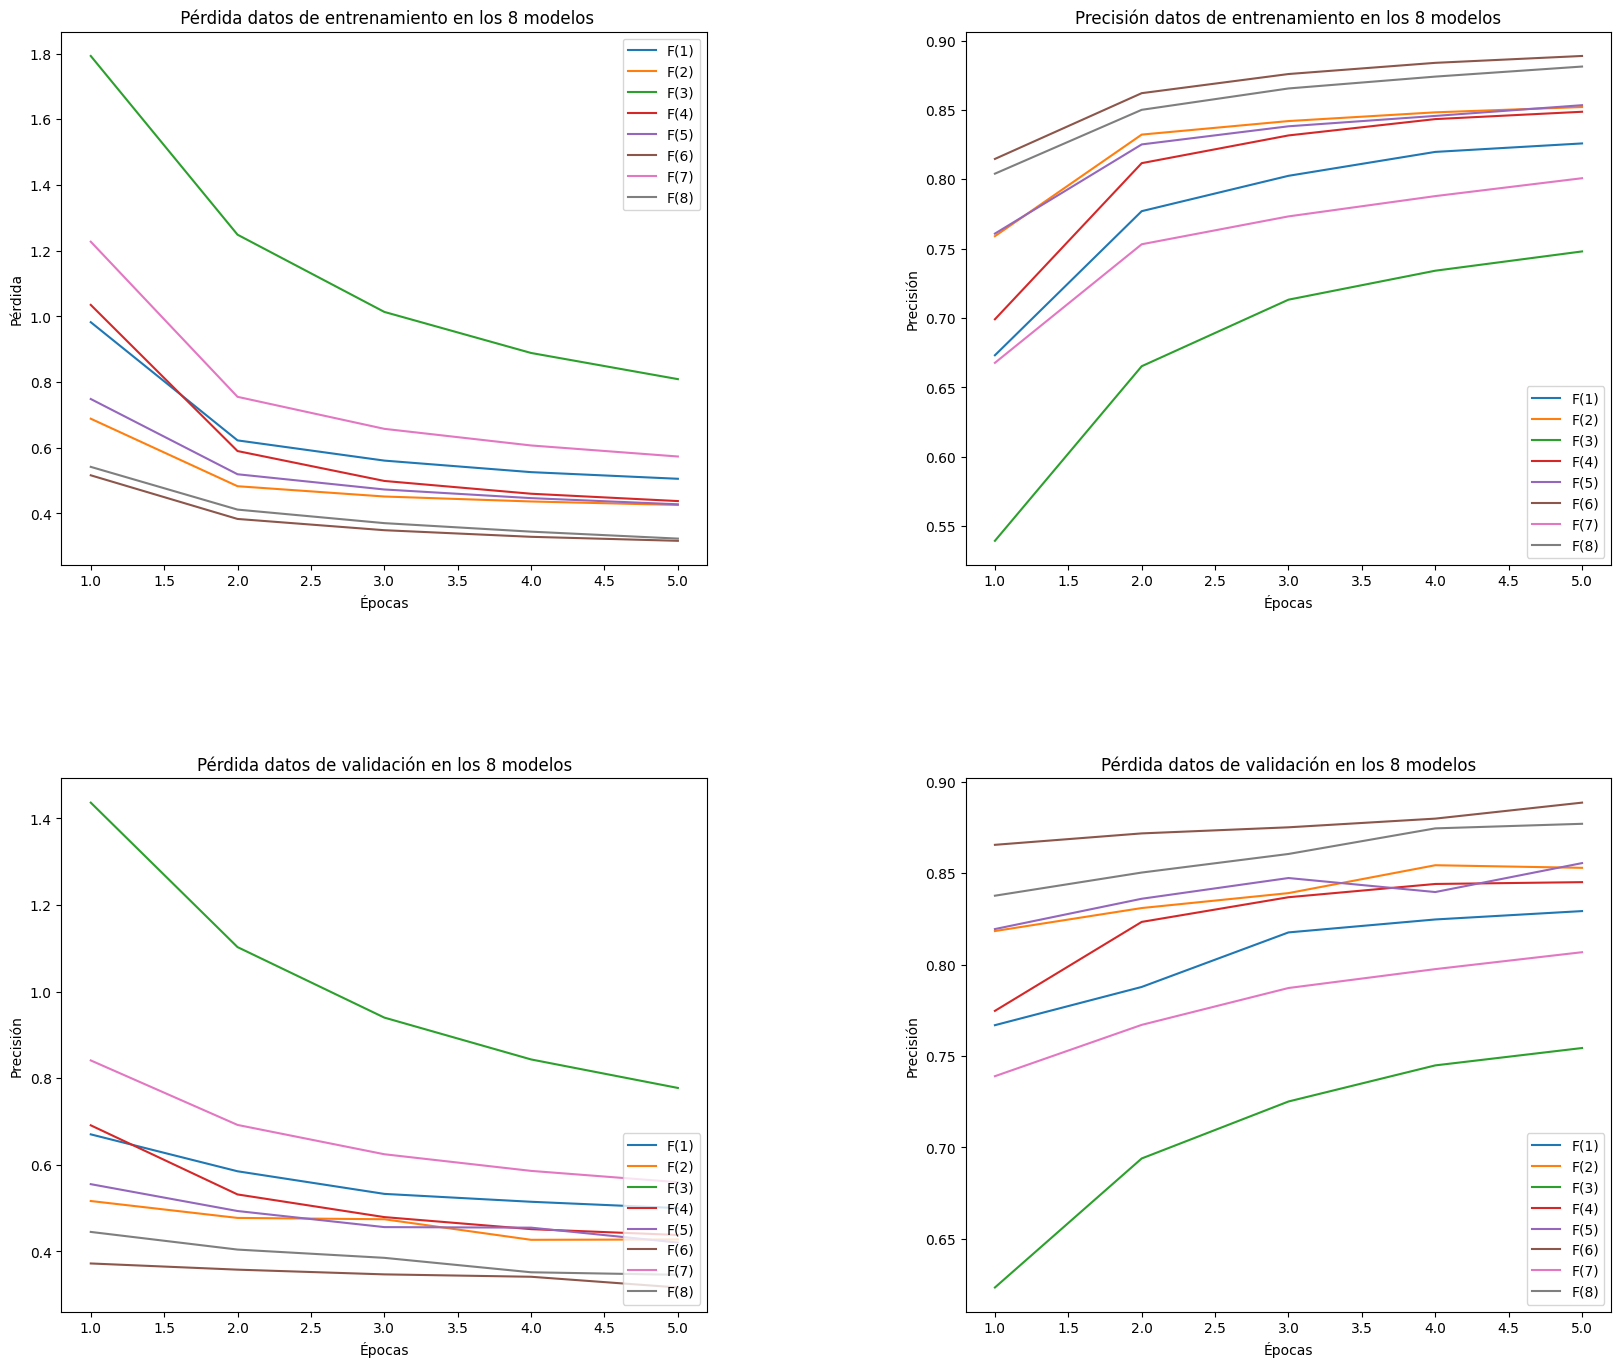

In [186]:
size = (15,10)
plt.subplot(221)
plt.plot(epochs,historys[0].history['loss'],
         epochs,historys[1].history['loss'],
         epochs,historys[2].history['loss'],
         epochs,historys[3].history['loss'],
         epochs,historys[4].history['loss'],
         epochs,historys[5].history['loss'],
         epochs,historys[6].history['loss'],
         epochs,historys[7].history['loss'])
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(('F(1)', 'F(2)','F(3)','F(4)','F(5)','F(6)','F(7)','F(8)'), prop = {'size': 10}, loc='upper right')
plt.title(' Pérdida datos de entrenamiento en los 8 modelos')
plt.rcParams["figure.figsize"] = size
plt.subplot(222)
plt.plot(epochs,historys[0].history['accuracy'],
         epochs,historys[1].history['accuracy'],
         epochs,historys[2].history['accuracy'],
         epochs,historys[3].history['accuracy'],
         epochs,historys[4].history['accuracy'],
         epochs,historys[5].history['accuracy'],
         epochs,historys[6].history['accuracy'],
         epochs,historys[7].history['accuracy'])
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(('F(1)', 'F(2)','F(3)','F(4)','F(5)','F(6)','F(7)','F(8)'), prop = {'size': 10}, loc='lower right')
plt.title('Precisión datos de entrenamiento en los 8 modelos')
plt.rcParams["figure.figsize"] = size
plt.subplot(223)
plt.plot(epochs,historys[0].history['val_loss'],
         epochs,historys[1].history['val_loss'],
         epochs,historys[2].history['val_loss'],
         epochs,historys[3].history['val_loss'],
         epochs,historys[4].history['val_loss'],
         epochs,historys[5].history['val_loss'],
         epochs,historys[6].history['val_loss'],
         epochs,historys[7].history['val_loss'])
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(('F(1)', 'F(2)','F(3)','F(4)','F(5)','F(6)','F(7)','F(8)'), prop = {'size': 10}, loc='lower right')
plt.title('Pérdida datos de validación en los 8 modelos')
plt.rcParams["figure.figsize"] = size
plt.subplot(224)
plt.plot(epochs,historys[0].history['val_accuracy'],
         epochs,historys[1].history['val_accuracy'],
         epochs,historys[2].history['val_accuracy'],
         epochs,historys[3].history['val_accuracy'],
         epochs,historys[4].history['val_accuracy'],
         epochs,historys[5].history['val_accuracy'],
         epochs,historys[6].history['val_accuracy'],
         epochs,historys[7].history['val_accuracy'])
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(('F(1)', 'F(2)','F(3)','F(4)','F(5)','F(6)','F(7)','F(8)'), prop = {'size': 10}, loc='lower right')
plt.title('Pérdida datos de validación en los 8 modelos')
plt.rcParams["figure.figsize"] = size
plt.subplots_adjust(bottom=0.1,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


plt.show()

De la gráficas anteriores se deduce que tanto un número alto de neuronas en la 1º capa como el optimizador rmsprop proporcionan los mejores resultados minimizando tanto la pérdida como la precisión. La combinación sgd-relu con 512 neuronas en la 1º capa proporciona unos valores muy similares a los anteriores descritos. Por contra, la combinación sigmoid-sgd produce el peor rendimiento con independencia del número de neuronas en la 1º capa.

En cuanto a los datos de validación y el indicador loss la combinación relu - rmsprop es la que produce mejores resultados y la de sigmoid - sgd los peores. Cabe destacar que en estas gráficas se muestra que la precisión no varía tanto por el número de neuronas en la 1º capa, sino que tienen más peso la combinación de los otros 2 factores en el siguiente orden:

relu - rmsprop > sigmoid - sgd > relu - sgd > sigmoid - rmsprop.

Overfitting:

Para observar si se produce el fenómeno de overfitting en los modelos utilizamos la función de pérdida con los datos de entrenamiento frente a la de validación.

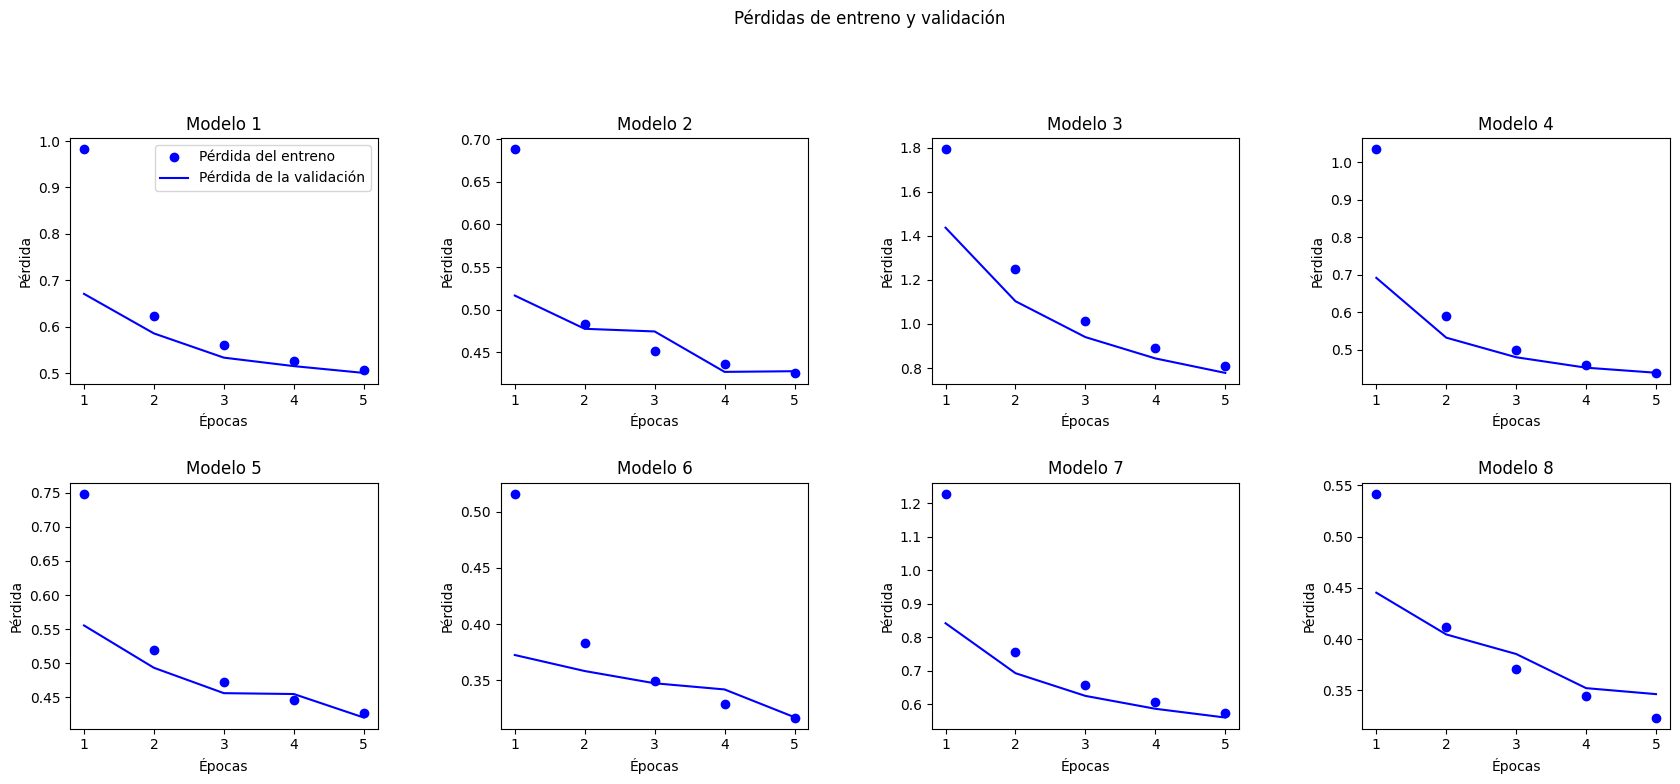

In [188]:
size = (20,16) #ramaño de las gráficas
plt.subplot(441)
plt.plot(epochs, historys[0].history['loss'], 'bo', label='Pérdida del entreno')
plt.plot(epochs, historys[0].history['val_loss'], 'b', label='Pérdida de la validación')
plt.title('Modelo 1')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.rcParams["figure.figsize"] = size
plt.legend()
plt.subplot(442)
plt.plot(epochs, historys[1].history['loss'], 'bo')
plt.plot(epochs, historys[1].history['val_loss'], 'b')
plt.title('Modelo 2')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.rcParams["figure.figsize"] = size
plt.subplot(443)
plt.plot(epochs, historys[2].history['loss'], 'bo')
plt.plot(epochs, historys[2].history['val_loss'], 'b')
plt.title('Modelo 3')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.rcParams["figure.figsize"] = size
plt.subplot(444)
plt.plot(epochs, historys[3].history['loss'], 'bo')
plt.plot(epochs, historys[3].history['val_loss'], 'b')
plt.title('Modelo 4')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.rcParams["figure.figsize"] = size
plt.subplot(445)
plt.plot(epochs, historys[4].history['loss'], 'bo')
plt.plot(epochs, historys[4].history['val_loss'], 'b')
plt.title('Modelo 5')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.rcParams["figure.figsize"] = size
plt.subplot(446)
plt.plot(epochs, historys[5].history['loss'], 'bo')
plt.plot(epochs, historys[5].history['val_loss'], 'b')
plt.title('Modelo 6')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.rcParams["figure.figsize"] = size
plt.subplot(447)
plt.plot(epochs, historys[6].history['loss'], 'bo')
plt.plot(epochs, historys[6].history['val_loss'], 'b')
plt.title('Modelo 7')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.rcParams["figure.figsize"] = size
plt.subplot(448)
plt.plot(epochs, historys[7].history['loss'], 'bo')
plt.plot(epochs, historys[7].history['val_loss'], 'b')
plt.title('Modelo 8')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.rcParams["figure.figsize"] = size
plt.suptitle('Pérdidas de entreno y validación')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

Tras visualizar las gráficas observamos que en los casos 2 (ligeramente) y 6 se produce sobreajuste a partir de la 3º iteración, es decir, estamos sobreajustando los pesos a los datos de entrenamiento y nuestros modelos estan aprendiendo representaciones que solo son específicas para estos datos haciendo que no generalizen para los datos de validación. Esto haría plantearnos el uso de estos modelos si se quisiera incrementar el número de epochs para entrenar a la red.


Matriz de Evaluación de los modelos:

|          | Entrenamiento |          | Validación |          |           |             |
|----------|---------------|----------|------------|----------|-----------|-------------|
| Modelos  | Loss          | Accuracy | Loss       | Accuracy | Resultado | Overfitting |
| 6        | 6             | 7        | 6          | 6        | 25        | Sí          |
| 8        | 7             | 6        | 1          | 7        | 21        | No          |
| 2        | 4             | 4        | 8          | 4        | 20        | Sí          |
| 5        | 5             | 5        | 3          | 5        | 18        | No          |
| 4        | 3             | 3        | 0          | 3        | 9         | No          |
| 1        | 2             | 2        | 2          | 2        | 8         | No          |
| 7        | 1             | 1        | 4          | 1        | 7         | No          |
| 3        | 0             | 0        | 5          | 0        | 5         | No          |

Comparando los modelos frente a los indicadores de pérdida y de precisión en las fases de entrenamiento y validación y asignando un peso equivalente a las 4 características se obtiene la tabla anterior en la cual los modelos aparecen ordenados en función de su rendimiento. El modelo que experimenta mejor comportamiento son los modelos 6 y 8 aunque el hecho de que se produzca overfitting en el modelos 6 haría plantearse otros modelos frente a este (el modelo 5) si se quiere entrenar con mayor número de epochs. Aún así, de los modelos 6 y 8 podemos destacar el número de neuronas en la 1º capa, 512,  y el optimizador `rmsprop`. Por contra, los modelos que experimentan peor comportamiento son los modelos 3 y 7 caracterizados ambos por la combinación de la función de activación `sigmoid` con el optimizador`sgd`.

El orden de los modelos con los datos de entrenamiento para loss y accuracy y los de validación para accuracy son idénticos, sin embargo, el orden de los modelos con los datos de validación para loss muestra la importancia de la combinación de la función de activación y el optimizador con independencia del número de neuronas que se apliquen.